**Universidade de São Paulo**  
**Instituto de Física**  
**Disciplina:** 4305512 - Aprendizado de máquina e inteligência artificial em física  
**Turma:** 2025201  
**Docentes:** Alexandre Alarcon do Passo Suaide, Tiago Fiorini da Silva, Luciana Varanda Rizzo  
**Discente:** Henrique Felix de Souza Machado  
**Nº USP:** 11554214  
**Link deste NB:** [https://github.com/hmfelix/ml-phy/blob/main/atividade2/atividade2.ipynb](https://github.com/hmfelix/ml-phy/blob/main/atividade2/atividade2.ipynb)

\section*{\LARGE ATIVIDADE 2}

---

\section*{ENUNCIADO}

**Descrição do conjunto de dados:**

Vamos utilizar um conjunto de dados sobre supercondutividade, disponível em: [https://archive.ics.uci.edu/ml/datasets/superconductivty+data](https://archive.ics.uci.edu/ml/datasets/superconductivty+data) e em [https://github.com/tiagofiorini/MLinPhysics/blob/main/Superconductivity.csv](https://github.com/tiagofiorini/MLinPhysics/blob/main/Superconductivity.csv). O conjunto possui dados sobre cerca de 21 mil materiais, com 81 colunas. Nossa variável alvo será a temperatura crítica (critical_temp). Os atributos são baseados em propriedades físicas e químicas dos materiais, descritas na Tabela 1 abaixo. Os materiais possuem de 1 a 9 elementos em sua composição. A partir das propriedades listadas na Tabela 1, foram criados atributos como: a massa atômica média dos elementos presentes em cada material (mean_atomic_mass), a média ponderada da massa atômica (wtd_mean_atomic_mass), a entropia (entropy_atomic_mass), a faixa de valores de massa atômica (range_atomic_mass), e assim por diante. Dessa forma, para cada uma das 8 propriedades listadas na Tabela 1, existem 10 atributos calculados de acordo com a Tabela 2, totalizando 80 atributos para cada material.

![Tabela 1](img/tabela1.png)

Tabela 1: Propriedades consideradas no conjunto de dados (Hamidieh, 2018).

![Tabela 2](img/tabela2.png)

Tabela 2: Métricas utilizadas para a criação de atributos, tendo como base as propriedades listadas na tabela 1. As fórmulas exemplificam os cálculos realizados para um material constituído por dois elementos, com propriedades distintas. Os valores numéricos mostram um exemplo para o material Re $_7$ Zr $_1$ (Hamidieh, 2018).

Atividade: Fazer uma análise de regressão supervisionada para determinar a temperatura crítica de materiais. Utilizar diferentes modelos e subconjuntos de dados, comparando o desempenho e a interpretabilidade.
1) Análise exploratória

2) Preparação dos dados: escalonamento, transformação, particionamento

3) Avaliar a importância dos atributos com base nos coeficientes de um modelo de regressão linear múltipla (com ou sem regularização, à sua escolha).

4) Avaliar a importância dos atributos com base em um regressor Random Forest ou Gradient Boosting.

5) Com base nos resultados dos itens 3 e 4, selecionar os atributos mais importantes. O número de atributos fica à sua escolha. Justificar sua escolha. Discutir brevemente se os atributos escolhidos possuem significado físico, ou seja, se de fato pode existir uma relação com a variável alvo (temperatura crítica).

6) Aplicar uma técnica de redução de dimensionalidade, como PCA (análise de componentes principais), criando novos atributos a partir de uma combinação dos atributos originais. O número de componentes principais a serem utilizadas fica à sua escolha (justificar escolha).

7) Construir um modelo de regressão linear múltipla com:
a) os atributos mais importantes, escolhidos no item 5;
b) usando as componentes principais como atributos (item 6).
Comparar o desempenho desses modelos na predição da temperatura crítica e a sua interpretabilidade (isto é, se é fácil ou não interpretar o significado físico dos coeficientes ajustados). Avalie se o modelo é capaz de predizer diferentes faixas de valores de temperatura crítica.

8) Construir um modelo de regressão baseado em Random Forest ou Gradient Boosting com:
a) apenas os atributos mais importantes, escolhidos no item 5;
b) usando as componentes principais como atributos (item 6).
Lembre-se de otimizar os hiperparâmetros. Comparar o desempenho desses modelos na predição da temperatura crítica e sua interpretabilidade. Avalie se o modelo é capaz de predizer diferentes faixas de valores de temperatura crítica.

9) Fazer uma breve discussão crítica sobre o desempenho, a interpretabilidade e o custo computacional dos modelos lineares e dos modelos baseados em árvores de decisão.

---

\section*{PROPOSTA DE RESOLUÇÃO}

# Exploração e preparação dos dados

Nesta primeira seção, abordo as questões $1$ e $2$ do enunciado.

## Importação e verificações de integridade

Primeiramente, vamos importar a base de dados e procurar se existem células vazias ou nulas.

In [2]:
import pandas as pd

dados = pd.read_csv('dados/Superconductivity.csv')
dados.shape

(21263, 82)

Vemos que a tabela possui $21.263$ observações com $82$ atributos cada. Para verificar se há dados ausentes, ou seja, se algum valor é de tipo `NoneType`, `numpy.na`, `pandas.NA` ou `NaT`, uso primeiramente o método `isna()`:

In [3]:
na_list = dados.isna().sum()
(na_list > 0).sum()

np.int64(0)

Ou seja, não temos valores ausentes no formato específico dessas classes. Vamos conhecer melhor cada coluna para ter certeza disso e explorar ainda mais a base. (Separo as colunas em lotes de $\approx 20$ para não estourar o limite de linhas imprimidas do Jupyter Notebook.)

In [4]:
dados.iloc[:,0:20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   number_of_elements       21263 non-null  int64  
 1   mean_atomic_mass         21263 non-null  float64
 2   wtd_mean_atomic_mass     21263 non-null  float64
 3   gmean_atomic_mass        21263 non-null  float64
 4   wtd_gmean_atomic_mass    21263 non-null  float64
 5   entropy_atomic_mass      21263 non-null  float64
 6   wtd_entropy_atomic_mass  21263 non-null  float64
 7   range_atomic_mass        21263 non-null  float64
 8   wtd_range_atomic_mass    21263 non-null  float64
 9   std_atomic_mass          21263 non-null  float64
 10  wtd_std_atomic_mass      21263 non-null  float64
 11  mean_fie                 21263 non-null  float64
 12  wtd_mean_fie             21263 non-null  float64
 13  gmean_fie                21263 non-null  float64
 14  wtd_gmean_fie         

In [5]:
dados.iloc[:,20:40].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   wtd_std_fie                21263 non-null  float64
 1   mean_atomic_radius         21263 non-null  float64
 2   wtd_mean_atomic_radius     21263 non-null  float64
 3   gmean_atomic_radius        21263 non-null  float64
 4   wtd_gmean_atomic_radius    21263 non-null  float64
 5   entropy_atomic_radius      21263 non-null  float64
 6   wtd_entropy_atomic_radius  21263 non-null  float64
 7   range_atomic_radius        21263 non-null  int64  
 8   wtd_range_atomic_radius    21263 non-null  float64
 9   std_atomic_radius          21263 non-null  float64
 10  wtd_std_atomic_radius      21263 non-null  float64
 11  mean_Density               21263 non-null  float64
 12  wtd_mean_Density           21263 non-null  float64
 13  gmean_Density              21263 non-null  flo

In [6]:
dados.iloc[:,40:60].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wtd_std_Density               21263 non-null  float64
 1   mean_ElectronAffinity         21263 non-null  float64
 2   wtd_mean_ElectronAffinity     21263 non-null  float64
 3   gmean_ElectronAffinity        21263 non-null  float64
 4   wtd_gmean_ElectronAffinity    21263 non-null  float64
 5   entropy_ElectronAffinity      21263 non-null  float64
 6   wtd_entropy_ElectronAffinity  21263 non-null  float64
 7   range_ElectronAffinity        21263 non-null  float64
 8   wtd_range_ElectronAffinity    21263 non-null  float64
 9   std_ElectronAffinity          21263 non-null  float64
 10  wtd_std_ElectronAffinity      21263 non-null  float64
 11  mean_FusionHeat               21263 non-null  float64
 12  wtd_mean_FusionHeat           21263 non-null  float64
 13  g

In [7]:
dados.iloc[:,60:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   wtd_std_FusionHeat               21263 non-null  float64
 1   mean_ThermalConductivity         21263 non-null  float64
 2   wtd_mean_ThermalConductivity     21263 non-null  float64
 3   gmean_ThermalConductivity        21263 non-null  float64
 4   wtd_gmean_ThermalConductivity    21263 non-null  float64
 5   entropy_ThermalConductivity      21263 non-null  float64
 6   wtd_entropy_ThermalConductivity  21263 non-null  float64
 7   range_ThermalConductivity        21263 non-null  float64
 8   wtd_range_ThermalConductivity    21263 non-null  float64
 9   std_ThermalConductivity          21263 non-null  float64
 10  wtd_std_ThermalConductivity      21263 non-null  float64
 11  mean_Valence                     21263 non-null  float64
 12  wtd_mean_Valence  

O resultado está em linha com aquele da função `isna()`, contando-se $21.263$ valores preenchidos em todas as colunas.

Agora vamos inspecionar os valores nulos presentes na tabela, para garantir que o zero não foi usado como substituto para valor não preenchido. Abaixo checo as colunas que possuem zeros, separando novamente em lotes para não estourar o limite de impressão:

In [8]:
colunas_com_zeros = (dados.iloc[:,0:] == 0).any()
colunas_com_zeros = colunas_com_zeros[colunas_com_zeros]

colunas_com_zeros[:20]


entropy_atomic_mass          True
wtd_entropy_atomic_mass      True
range_atomic_mass            True
wtd_range_atomic_mass        True
std_atomic_mass              True
wtd_std_atomic_mass          True
entropy_fie                  True
wtd_entropy_fie              True
range_fie                    True
wtd_range_fie                True
std_fie                      True
wtd_std_fie                  True
entropy_atomic_radius        True
wtd_entropy_atomic_radius    True
range_atomic_radius          True
wtd_range_atomic_radius      True
std_atomic_radius            True
wtd_std_atomic_radius        True
entropy_Density              True
wtd_entropy_Density          True
dtype: bool

In [9]:
colunas_com_zeros[20:40]

range_Density                      True
wtd_range_Density                  True
std_Density                        True
wtd_std_Density                    True
entropy_ElectronAffinity           True
wtd_entropy_ElectronAffinity       True
range_ElectronAffinity             True
wtd_range_ElectronAffinity         True
std_ElectronAffinity               True
wtd_std_ElectronAffinity           True
entropy_FusionHeat                 True
wtd_entropy_FusionHeat             True
range_FusionHeat                   True
wtd_range_FusionHeat               True
std_FusionHeat                     True
wtd_std_FusionHeat                 True
entropy_ThermalConductivity        True
wtd_entropy_ThermalConductivity    True
range_ThermalConductivity          True
wtd_range_ThermalConductivity      True
dtype: bool

In [10]:
colunas_com_zeros[40:]

std_ThermalConductivity        True
wtd_std_ThermalConductivity    True
entropy_Valence                True
wtd_entropy_Valence            True
range_Valence                  True
wtd_range_Valence              True
std_Valence                    True
wtd_std_Valence                True
dtype: bool

Ou seja, só possuem zeros as colunas para as quais esse valor faz sentido: entropia (`entropy`), espectro de valores (`range`) e desvio padrão (`std`), que de fato só podem ser zero para moléculas monoatômicas. Como podemos ver abaixo, há cerca de $285$ substâncias com essa característica:

In [11]:
(dados['number_of_elements'] == 1).sum()

np.int64(285)

A análise realizada até aqui indica que pelo menos **o preenchimento da tabela está completo, não havendo valores faltantes**. 

Ainda, vemos que só existem colunas numéricas na tabela, o que faz sentido dada a descrição da base feita pelo enunciado. Isso nos indica que **não será necessário transformar nenhuma variável categórica em variável numérica**.

## Exploração de correlações

Primeiramente vamos ver como está distribuída a variável-alvo:

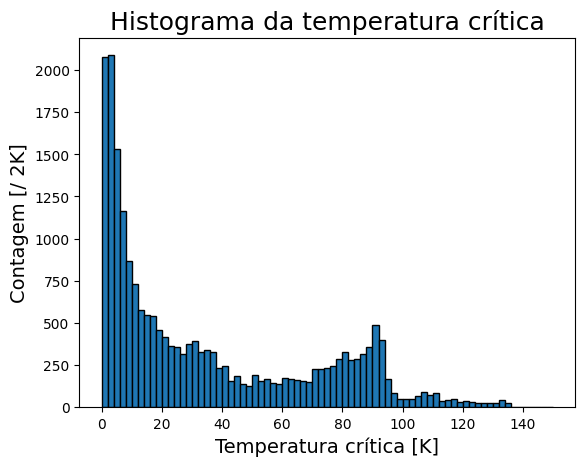

In [12]:
from matplotlib import pyplot as plt

ct = dados['critical_temp']

passo = 2
bins = list(range(0, 151, passo))

plt.hist(ct, bins=bins, edgecolor='black')
plt.title('Histograma da temperatura crítica', size=18)
plt.xlabel('Temperatura crítica [K]', size=14)
plt.ylabel(f'Contagem [/ {passo}K]', size=14);

Vemos que existe um enorme número de materiais com temperatura crítica perto de zero graus Kelvin ($<4$ K). A frequência vai decrescendo com a temperatura, inicialmente de modo vertiginoso, depois paulatinamente mais suave, até antigir uma região de menor frequência em torno de $40$ a $60$ K, de onde volta a subir até $92$ K, caindo abruptamente para uma faixa de frequência muito baixa que decai até praticamente zero a partir de $140$ K. O valor máximo é:


In [12]:
print(f'{round(max(ct))} K')

185 K


Para realizar visualizações ulteriores, vou encurtar os nomes das colunas com siglas, abrindo espaço nos gráficos e tabelas. Para isso, defino os seguintes mapeamentos:

In [13]:
nome_principal_dict = {
    'number_of_elements': 'ne',
    'atomic_mass': 'am',
    'fie': 'f',
    'atomic_radius': 'ar',
    'Density': 'd',
    'ElectronAffinity': 'ea',
    'FusionHeat': 'fh',
    'ThermalConductivity': 'tc',
    'Valence': 'v',
    'critical_temp': 'ct'
}

nome_metrica_dict = {
    'mean': 'm',
    'entropy': 'e',
    'range': 'r',
    'std': 's',
    'wtd_': 'w'
}

E os aplico aos dados, criando uma cópia para preservar a tabela original:

In [14]:
dados_tratados = dados.copy()
nomes_colunas = list(dados_tratados.columns)

for i, nome_coluna in enumerate(nomes_colunas):
    for chave, valor in nome_principal_dict.items():
        nome_coluna = nomes_colunas[i]
        nomes_colunas[i] = nome_coluna.replace(chave, valor)
    for chave, valor in nome_metrica_dict.items():
        nome_coluna = nomes_colunas[i]
        nomes_colunas[i] = nome_coluna.replace(chave, valor)

dados_tratados.columns = nomes_colunas

Agora ploto o *heatmap* de correlação dos dados:

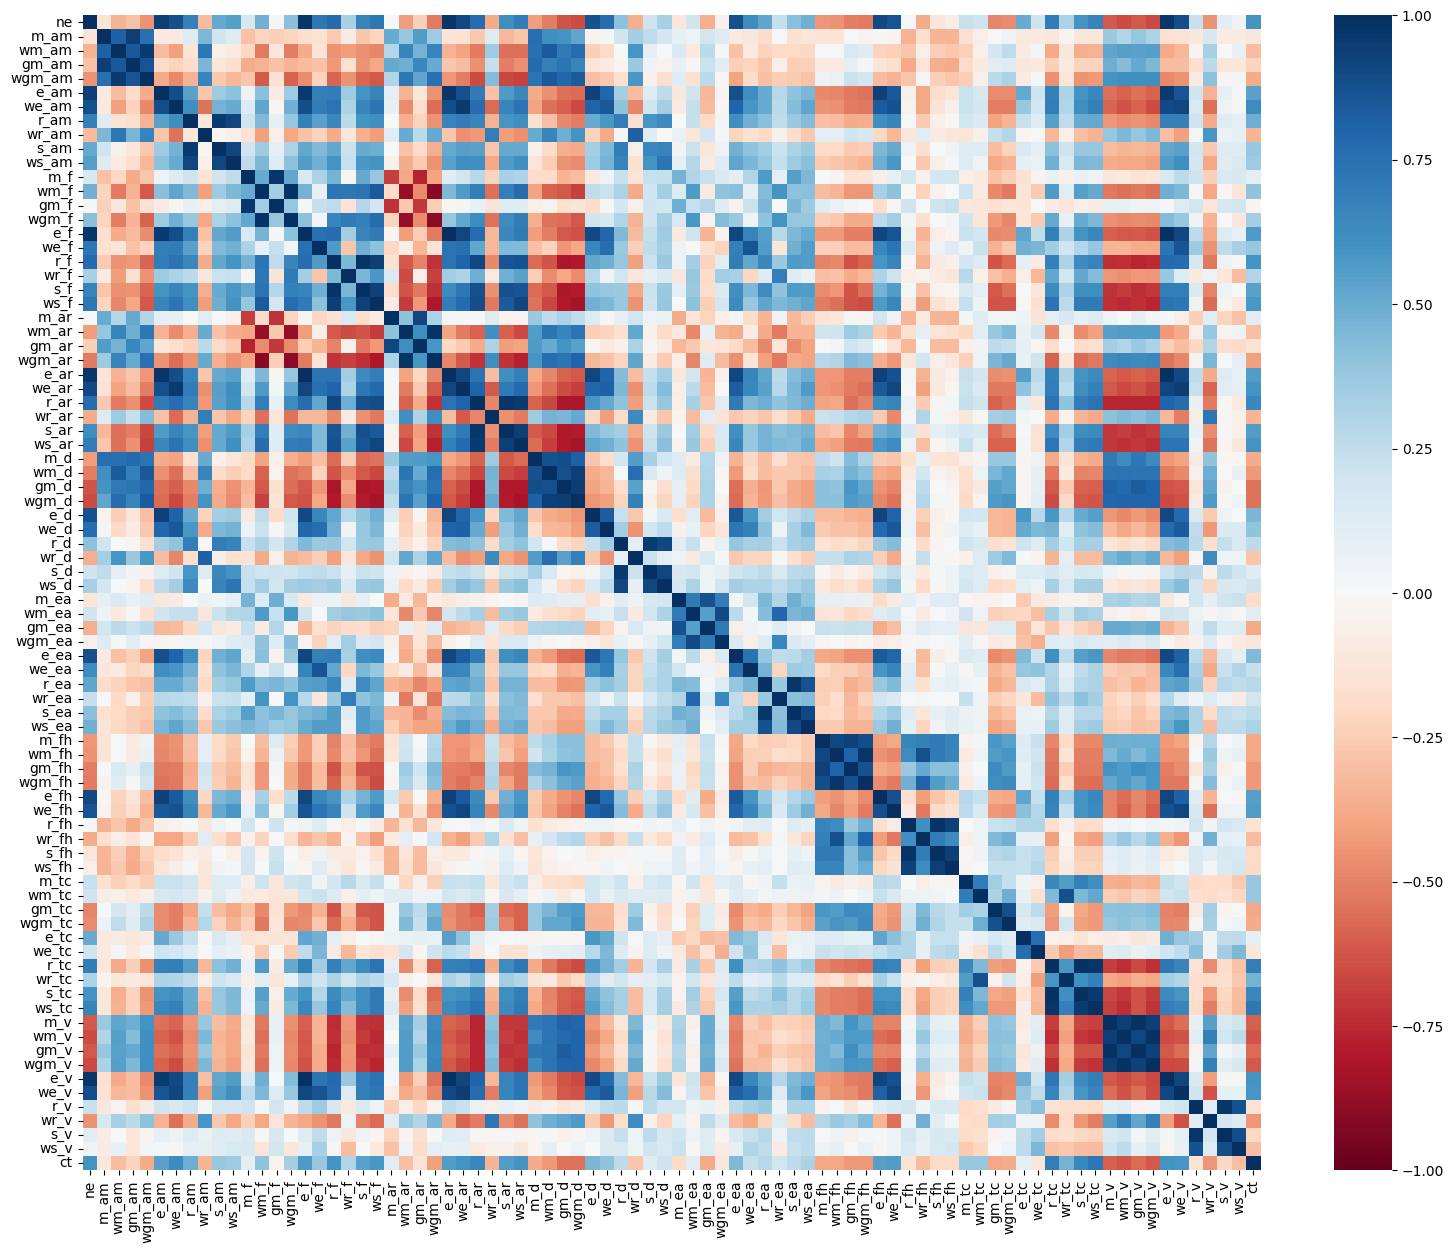

In [15]:
import seaborn as sns
plt.figure(figsize=(19, 15))
matriz_correlacao = dados_tratados.corr().round(2)
sns.heatmap(matriz_correlacao, cmap = 'RdBu', vmin=-1, vmax=1);

Da imagem podemos observar uma série de elementos para entender melhor a base de dados.

Primeiro, podemos observar que existem quadrados azuis (forte correlação) que aparecem e desaparecem com certa regularidade em torno da diagonal principal. Isso indica que, dentro de uma mesma grandeza física de base da Tabela $1$ do enunciado (exs.: entropia, densidade, valência etc),  as quantidades associadas a cada grupo de indicadores costumam ser fortemente correlacionadas, o que faz sentido. 

O primeiro padrão observável nesse sentido é dado pela média, cujo grupo `mean`, `gmean`, `wtd_mean` e `wtd_gmean` tende a se repetir em quadrados azuis a cada nova grandeza física de base.

Um segundo padrão, que geralmente quebra o tamanho desses quadrados da diagonal principal, é dado pelas estatísticas de entropia (`entropy` e `wtd_entropy`). Estas muitas vezes estão ou fracamente correlacionadas ou até mesmo anticorrelacionadas com os indicadores de média. Na verdade, os indicadores de entropia tendem a se correlacionar fortemente com o número de elementos presentes, o que faz sentido físico na medida em que um maior número de elementos aumenta o número de configurações (microestados). Ainda, os indicadores de entropia entre diferentes grandezas físicas de base são correlacionados, o que suspeito se dever ao mesmo fato.

Outro padrão de quadrados na diagonal principal é o conjunto de indicadores de espectro de valores (`range` e `wtd_range`) juntamente com desvio-padrão (`std` e `wtd_std`). É de se esperar que esses dois grupos estejam correlacionados, uma vez que ambos são diferentes medidas para a largura da distribuição dos dados. Novamente, correlações desse tipo são frequentes também entre diferentes grupos das $8$ grandezas de base.

Quatro propriedades fisicamente relacionadas tendem a apresentar forte anticorrelação: a valência, a densidade, a energia de ionização e o raio atômico. Na medida em que a densidade é uma função do raio e ambos se relacionam com a energia potencial dos elétrons na camada de valência, tais correlações são esperadas.

Nota-se por fim que a valência e a condutividade térmica são fortemente anticorrelacionadas. Esse fato se explica porque a baixa valência tendem a formar ligações fracas, com elétrons de deslocamento mais fácil (condutividade), enquanto valências elevadas formam ligações covalentes mais intensas e direcionais, dificultando o trânsito.

Por todo o exposto, concluo que existem vários bolsões de forte correlação ou anticorrelação, o que nos indica que técnicas tais como redução de dimensionalidade e seleção de atributos principais podem gerar bons resultados. Apesar dessas correlações, o conjunto de dados apresenta relação complexa com a variável-alvo (`critical_temp` ou `ct`), visto que esta tende a apresentar correlações menos intensas.

## Escalonamento e transformação

Agora vamos explorar um pouco mais a distribuição das variáveis da base para verificar a necessidade de transformações e escalonamentos, bem como entender melhor o fenômeno estudado. Primeiramente, vamos recuperar uma descrição estatística sintética:

In [16]:
descricao = dados_tratados.describe().round(1)
descricao

,ne,m_am,wm_am,gm_am,wgm_am,e_am,we_am,r_am,wr_am,s_am,...,wm_v,gm_v,wgm_v,e_v,we_v,r_v,wr_v,s_v,ws_v,ct
count,21263.0,21263.0,21263.0,21263.0,21263.0,21263.0,21263.0,21263.0,21263.0,21263.0,...,21263.0,21263.0,21263.0,21263.0,21263.0,21263.0,21263.0,21263.0,21263.0,21263.0
mean,4.1,87.6,73.0,71.3,58.5,1.2,1.1,115.6,33.2,44.4,...,3.2,3.1,3.1,1.3,1.1,2.0,1.5,0.8,0.7,34.4
std,1.4,29.7,33.5,31.0,36.7,0.4,0.4,54.6,27.0,20.0,...,1.2,1.0,1.2,0.4,0.4,1.2,1.0,0.5,0.5,34.3
min,1.0,6.9,6.4,5.3,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.0,72.5,52.1,58.0,35.2,1.0,0.8,78.5,16.8,32.9,...,2.1,2.3,2.1,1.1,0.8,1.0,0.9,0.5,0.3,5.4
50%,4.0,84.9,60.7,66.4,39.9,1.2,1.1,122.9,26.6,45.1,...,2.6,2.6,2.4,1.4,1.2,2.0,1.1,0.8,0.5,20.0
75%,5.0,100.4,86.1,78.1,73.1,1.4,1.4,154.1,38.4,59.3,...,4.0,3.7,3.9,1.6,1.3,3.0,1.9,1.2,1.0,63.0
max,9.0,209.0,209.0,209.0,209.0,2.0,2.0,208.0,205.6,101.0,...,7.0,7.0,7.0,2.1,1.9,6.0,7.0,3.0,3.0,185.0


Como há muitas variáveis, a visualização em forma de tabela *wide* é dificultada. Portanto, realizo uma nova descrição via `describe`, desta vez de algumas linhas do resumo acima. Abaixo estudo estatísticas básicas: mínimos e máximos:

In [17]:
estatisticas_interesse = ['min', 'max']
pd.DataFrame({estatistica + ' por coluna': descricao.loc[estatistica].describe() for estatistica in estatisticas_interesse}).round(1)

,min por coluna,max por coluna
count,82.0,82.0
mean,21.1,2129.4
std,81.4,6003.7
min,0.0,1.6
25%,0.0,7.0
50%,0.0,206.8
75%,1.0,344.9
max,375.5,22590.0


Vemos que os dados abrangem uma gama de magnitudes e escalas. O valor máximo da base é $22.590$, quatro ordens de magnitude maior que o menor máximo dentre os atributos ($1.6$). Isso faz com que seja recomendável escalonar os dados.

Já o valor mínimo da base é zero, ou seja, estamos trabalhando apenas com dados não negativos. Isso indica que não precisamos usar escalonamentos que preservam sinal.

**Inicialmente, uso o `MinMaxScaler` para possibilitar uma comparação entre as distribuições dos atributos**:

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler_instance = MinMaxScaler()
col_names = list(dados_tratados.columns)
dados_tratados_std_scaler = pd.DataFrame(scaler_instance.fit_transform(dados_tratados), columns=col_names)

Vou agora realizar um procedimento exploratório semelhante para ter uma noção da variabilidade das distribuições de cada atributo:

In [19]:
descricao_std_scaler = dados_tratados_std_scaler.describe()
estatisticas_interesse_escalonada = ['mean', '25%', '50%', '75%', 'std']
pd.DataFrame({estatistica + ' por coluna': descricao_std_scaler.loc[estatistica].describe() for estatistica in estatisticas_interesse_escalonada}).round(3)

,mean por coluna,25% por coluna,50% por coluna,75% por coluna,std por coluna
count,82.000,82.000,82.000,82.000,82.000
mean,0.347,0.231,0.349,0.450,0.166
std,0.153,0.136,0.200,0.204,0.054
min,0.073,0.003,0.016,0.102,0.081
25%,0.220,0.133,0.181,0.277,0.126
50%,0.344,0.217,0.329,0.437,0.167
75%,0.459,0.336,0.526,0.616,0.195
max,0.605,0.504,0.930,0.930,0.369


Com os dados já escalonados, vemos que o desvio-padrão médio das colunas é de $0.166$, quase $30\%$ do valor máximo médio ($0.605$) e cerca de metade da média das médias das colunas. Isso indica uma largura razoável das distribuições. Ainda, a média das medianas das colunas se encontra mais próxima de zero que de um ($0.349$), e os quartis $25\%$ e $75\%$ estão, em média, ambos abaixo de $0.5$. Ou seja, temos um grande número de distribuições mais próximas de zero, potencialmente com outliers ou caudas mais pesadas em direção a um.

Para visualizar melhor essas distribuições, recorro ao ridgeplot abaixo:

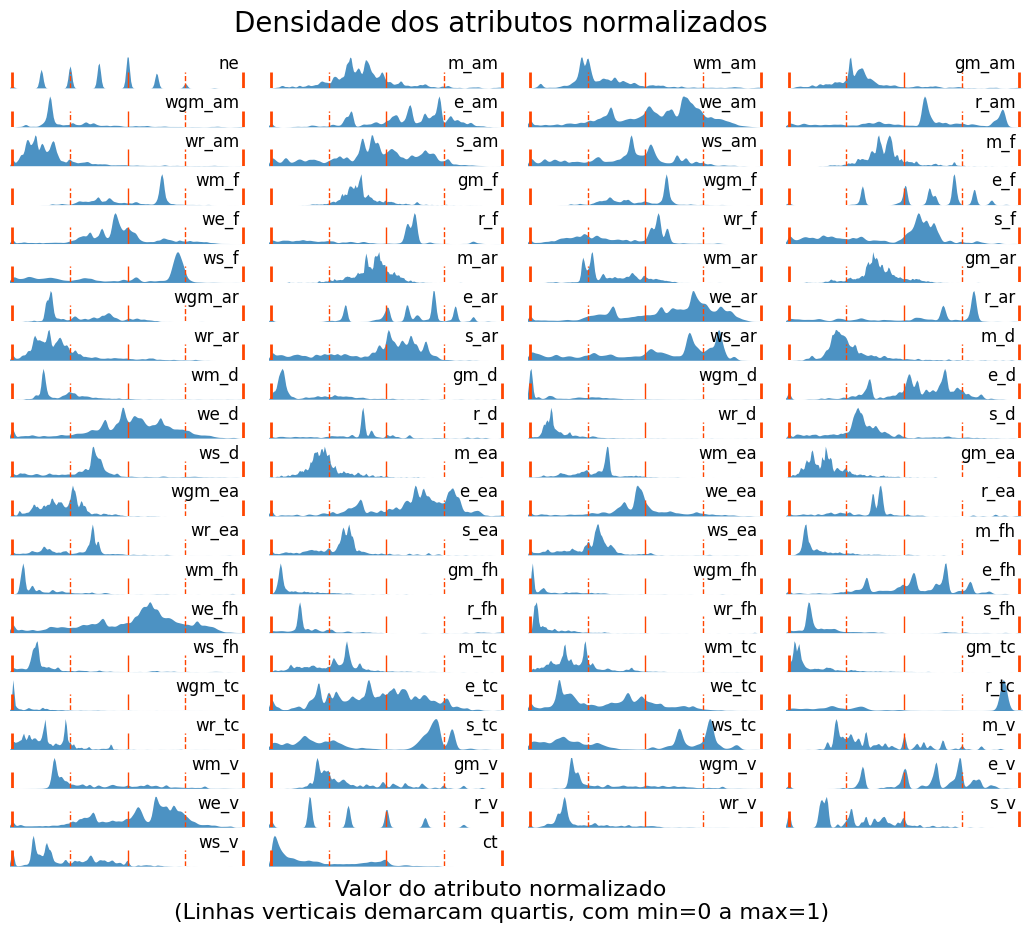

In [20]:
# jogando a tabela de formato wide para formato long
dados_tratados_long = dados_tratados_std_scaler.melt(var_name='atributo', value_name='valor')
dados_tratados_long

# numero de colunas verticais de plot
n_cols_ridgeplot = 4

# definindo a paleta
paleta = sns.cubehelix_palette(dados_tratados_std_scaler.shape[1], rot=-.25, light=.7)

# criando a rede de plot
g = sns.FacetGrid(
    dados_tratados_long,
    col='atributo',
    col_wrap=n_cols_ridgeplot,
    sharex=False,
    sharey=False,
    height=1.5,
    aspect=1,
    palette=paleta
)

# removendo titulos-padrão
g.set_titles("")

# adicionando densidades
g.map(sns.kdeplot,
      'valor',
      bw_adjust=0.3,
      fill=True,
      alpha=0.8,
      linewidth=0
)

# removendo ticks
g.set(xticks=[], yticks=[])
g.despine(bottom=True, left=True)

# customizando subplots
for i, ax in enumerate(g.axes.flatten()):
    ax.text(
        x=0.975,
        y=1.0,
        s=g.col_names[i],
        transform=ax.transAxes,
        ha='right',
        va='top',
        fontsize=12
    )
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_yticklabels([]) 
    ax.tick_params(left=False)
    ax.set_xlim(-.01, 1.01) 
    ax.vlines(x=0, ymin=0, ymax=ax.get_ylim()[1]/2, color='orangered', linewidth=2)
    ax.vlines(x=.25, ymin=0, ymax=ax.get_ylim()[1]/2, color='orangered', linewidth=1, linestyles='dashed')
    ax.vlines(x=.5, ymin=0, ymax=ax.get_ylim()[1]/2, color='orangered', linewidth=1)
    ax.vlines(x=.75, ymin=0, ymax=ax.get_ylim()[1]/2, color='orangered', linewidth=1, linestyles='dashed')
    ax.vlines(x=1, ymin=0, ymax=ax.get_ylim()[1]/2, color='orangered', linewidth=2)

# espaçamento
plt.subplots_adjust(
    hspace=0.2,
    wspace=0.1 
)

# titulo geral
g.fig.suptitle(
    'Densidade dos atributos normalizados',
    fontsize=20,
    y=1.05,
    x=0.53,
    ha='center'
)

# titulo eixo x
g.fig.supxlabel(
    'Valor do atributo normalizado\n(Linhas verticais demarcam quartis, com min=0 a max=1)',
    fontsize=16,
    y=-0.05,
    x=0.53,
    ha='center'
)

# tamanho
g.fig.set_size_inches(11.7, 8.3)

Com efeito, as distribuições são bastante diferentes.

Muitas delas possuem vários pontos de concentração (picos) e/ou vales com altitude razoável (platôs), o que é ideal porque os valores se encontram mais dispersos.

**Minha preocupação reside nas distribuições que, ao contrário, estão muito concentradas de um só lado - aquelas que enviesaram os resultados anteriores. Para estas, decidi aplicar transformações logarítmicas**.

Depois de alguns testes, constatei que houve ganho nas distribuições dos atributos das listas abaixo. Nos testes, variei entre as seguintes transformações: `MinMaxScaler` $\rightarrow$ `np.log1p` $\rightarrow$ `MinMaxScaler`; `np.log1p` $\rightarrow$ `MinMaxScaler`, e `np.log` $\rightarrow$ `MinMaxScaler`. (Lembrando que `np.log1p` $=\log(1+x)$ evita distorções causadas por valores nulos ou muito próximos de nulos.) Para cada atribuito, escolhi a transformação que distribuiu melhor os dados:

In [21]:
import numpy as np

scaler_log1p_scaler = [
    'wgm_am',
    'wr_am',
    'wr_ar',
    'm_d',
    'gm_d',
    'wm_d',
    'wr_d',
    'm_ea',
    'wm_ea',
    'gm_ea',
    'wgm_ea',
    'm_fh',
    'r_fh',
    'm_tc',
    'wm_tc',
    'wr_v'
]

log1p_scaler = [
    'wgm_d',
    'gm_fh',
    'wgm_fh',
    'wr_fh',
    's_fh',
    'gm_tc',
    'wr_tc'
]

log_scaler = [
    'wm_fh',
]

logaritmizados = scaler_log1p_scaler + log1p_scaler + log_scaler

for atributo in scaler_log1p_scaler:
    dados_tratados[atributo] = scaler_instance.fit_transform(
        pd.DataFrame(np.log1p(dados_tratados_std_scaler[atributo]))
    )

for atributo in log1p_scaler:
    dados_tratados[atributo] = scaler_instance.fit_transform(
        pd.DataFrame(np.log1p(dados_tratados[atributo]))
    )

for atributo in log_scaler:
    dados_tratados[atributo] = scaler_instance.fit_transform(
        pd.DataFrame(np.log(dados_tratados[atributo]))
    )

for atributo in [a for a in list(dados_tratados.columns) if a not in logaritmizados]:
        dados_tratados[atributo] = scaler_instance.fit_transform(
        pd.DataFrame(dados_tratados[atributo])
    )

O gráfico abaixo mostra como a transformação logarítmica ajudou a distribuir um pouco melhor os dados, o que espero melhorar o desempenho dos algoritmos (todos os valores já estão normalizados de novo pelo `MinMaxScaler`):

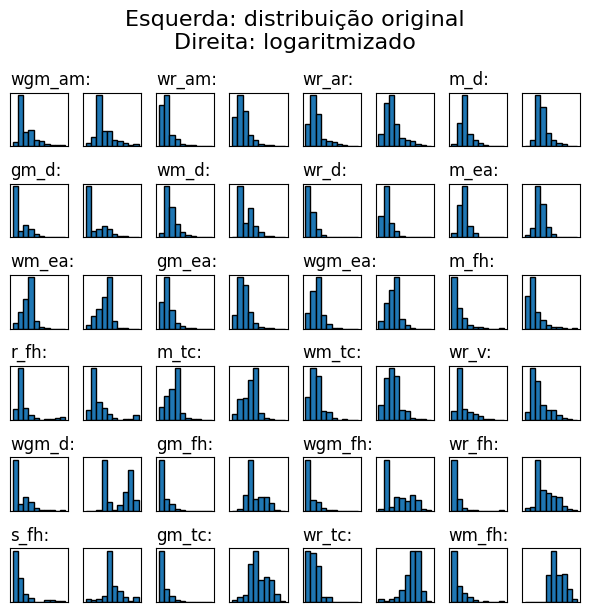

In [22]:
fig, axes = plt.subplots(6,8, figsize=(6,6.2))
axes = axes.flatten()
for i, atributo in enumerate(logaritmizados):
    axes[2*i].hist(dados_tratados_std_scaler[atributo], edgecolor='black')
    axes[2*i].set_yticklabels('')
    axes[2*i].set_xticklabels('')
    axes[2*i].set_yticks([])
    axes[2*i].set_xticks([])
    axes[2*i].set_title(atributo + ':', loc='left')
    axes[2*i+1].hist(dados_tratados[atributo], edgecolor='black')
    axes[2*i+1].set_yticklabels('')
    axes[2*i+1].set_xticklabels('')
    axes[2*i+1].set_yticks([])
    axes[2*i+1].set_xticks([])

fig.suptitle('Esquerda: distribuição original\nDireita: logaritmizado', size=16)

plt.tight_layout()

## Particionamento

Tendo em vista o trabalho de transformações logarítmicas feito acima, em que reduzimos significativamente o desbalanceamento dos dados, escolho usar uma amostragem aleatória para fins de particionamento, reservando $20\%$ dos dados para teste:

In [23]:
from sklearn.model_selection import train_test_split

y = dados_tratados['ct']
X = dados_tratados.drop('ct', axis=1)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=13)

---

# Redução de dimensionalidade

Esta seção visa responder a questão $6$ do enunciado.

## Inicialização

Primeiramente, vamos inicializar o PCA e visualizar a dispersão dos dados entre os dois componentes mais explicativos:

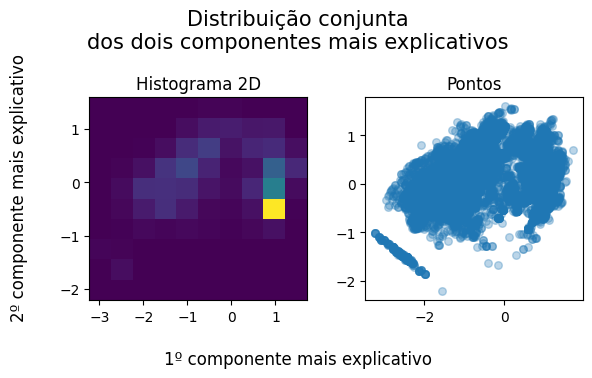

In [24]:
from sklearn.decomposition import PCA

# iniciando o PCA para obter metricas de explicabilidade
pca = PCA()
pca.fit(X_treino)
dados_pca = pca.transform(X_treino)

# setup do plot
fig, axes = plt.subplots(1,2, figsize=(6,3.7))
x = dados_pca[:,0]
y = dados_pca[:,1]

# histograma
axes[0].hist2d(x, y)
axes[0].set_title('Histograma 2D')

axes[1].scatter(x, y, s=30, alpha=.3)
axes[1].set_title('Pontos')
fig.supxlabel('1º componente mais explicativo', size=12)
fig.supylabel('2º componente mais explicativo', size=12)
fig.suptitle('Distribuição conjunta\ndos dois componentes mais explicativos', size=15)
plt.tight_layout()

Apesar de uma maior concentração em certas regiões, vemos que há dispersão suficiente para propiciar a aplicação do algoritmo.

## Determinação dos componentes principais

Vamos agora usar a explicabilidade acumulada para checar o número de componentes que explicam 90% da variância dos dados:

In [25]:
# calculando explanabilidade acumulada
explicabilidade = pca.explained_variance_ratio_.cumsum()

# definindo um iterador para percorrer a explicabilidade acumulada
def expl_cum_gen():
    for e in explicabilidade:
        yield e

# lista de fatores
fatores = list(range(1, X_treino.shape[1]+1))

# loop para percorrer a explicabilidade acumulada
# (fator_90 estoca o primeiro numero que explica mais que 90%)
gen = expl_cum_gen()
expl_cum = next(gen) # equivale a expl_cum = explicabilidade[0]
fator_90 = 1 # ja inicio em 1 porque queremos o proximo fator depois de 90%
while expl_cum < 0.9:
    expl_cum = next(gen)
    fator_90 += 1

O número desejado está na variável `fator_90` definida acima. Abaixo faço um plot para visuzalizar o resultado. Vale notar que dei um zoom na parte inicial do gráfico, para melhor visualização, pois o plot de todos os $81$ atributos deixaria o gráfico poluído.

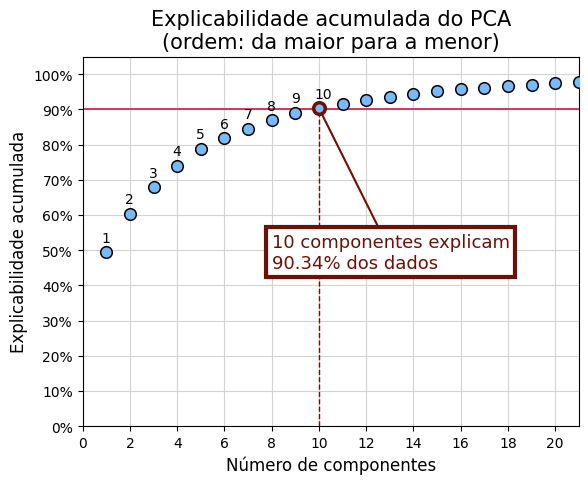

In [26]:
# pontos
plt.scatter(fatores, explicabilidade, color='xkcd:sky blue', zorder=3, edgecolors='black', linewidths=1.1, s=70)

# eixos
plt.yticks(np.array(range(0,11))/10, [str(x) + '%' for x in list(range(0,101,10))])
plt.xticks(list(range(0,21,2)))
plt.xlim(0, 21)
plt.ylim(0,1.05)

# titulos
plt.title('Explicabilidade acumulada do PCA\n(ordem: da maior para a menor)', size=15)
plt.xlabel('Número de componentes', size=12)
plt.ylabel('Explicabilidade acumulada', size=12)

# indicacao do menor numero de componentes >90%
cor_fator_90 = 'xkcd:reddy brown'
plt.vlines(fator_90, 0, expl_cum, colors=cor_fator_90, linewidth=1, linestyles='--')
plt.text(8, 0.45, f'{fator_90} componentes explicam\n{round(expl_cum*100, 2)}% dos dados', color=cor_fator_90,  fontsize=13, bbox={'facecolor': 'white', 'edgecolor': cor_fator_90, 'linewidth': 3}, zorder=6)
plt.scatter(fator_90, expl_cum, color='xkcd:sky blue', edgecolors=cor_fator_90, linewidths=2.5, zorder=5, s=70)
plt.plot([fator_90, 13], [expl_cum, .5], color=cor_fator_90, zorder=4)

# sarrafo
plt.hlines(0.9, -0, 21, colors='crimson', linewidth=1.2)

# grade
plt.grid(True, which='major', zorder=0, color='lightgrey')

# indicacao do numero acumulado de componentes sobre os primeiros pontos,
# para auxiliar o leitor
for i in range(0,fator_90):
    plt.text(fatores[i]-0.2, explicabilidade[i]+0.03, str(fatores[i]), size=10, zorder=3)

Ou seja, dos $81$ atributos iniciais, **10 componentes é o conjunto mínimo para explicar pelo menos $90\%$ da variância dos dados** (no caso, explicam $90.34\%$).

Em um primeiro momento, eu esperava que esse número seria até maior, considerando a grande quantidade de atributos na base de dados. Apesar de $10$ ainda não ser um número baixo, considero que seja adequado, tendo em vista que foi possível obter uma redução razoavelmente grande (por um fator de aproximadamente oito), sem no entanto reduzir a um número muito pequeno (preservando as chances de previsões razoáveis). Além disso, ainda é um número que permite algum grau de interpretabilidade.

Agora só nos resta aplicar um PCA com $10$ componentes aos conjuntos de treino e de teste:

In [27]:
pca_fator_90 = PCA(n_components=fator_90)
X_treino_pca = pca.fit_transform(X_treino)
X_teste_pca = pca.transform(X_teste)

## Recuperando as variáveis mais importantes

Vale lembrar que cada componente principal é uma combinação linear das variáveis originais. Ou seja, para cada componente, cada variável original possui um respectivo coeficiente em uma soma linear. Este coeficiente nos dá o peso daquela variável para a determinação daquele componente.

Para recuperar quais variáveis originais explicam os $10$ componentes escolhidos, podemos usar a matriz `PCA().components_` fornecida pelo Scikit-Learn, que estoca os coeficientes nas colunas e os componentes nas linhas.

Peguemos as dez primeiras componentes e recuperemos o respectivo maior coeficiente. Uso o objeto `Series` do `pandas` para manter o registro da coluna original (variável original) após fazer o ordenamento. Visto que os coeficientes podem ser negativos, é necessário usar seu valor absoluto:

In [29]:
numero_variaveis_originais = []
nome_variaveis_originais = []
print(f'Variáveis mais importantes para os {fator_90} principais componentes:')
print('Componente    Variável')
for i in range(fator_90):
    var = pd.Series(abs(pca.components_[i])).sort_values(ascending=False).index[0]
    numero_variaveis_originais.append(var)
    nome_variaveis_originais.append(dados_tratados.columns[var])
    print(f'     {i+1}        {dados_tratados.columns[var]}')


Variáveis mais importantes para os 10 principais componentes:
Componente    Variável
     1        r_tc
     2        we_tc
     3        r_fh
     4        ws_am
     5        r_fh
     6        r_am
     7        wr_f
     8        r_v
     9        r_v
     10        r_ea


Notamos que as variáveis mais importantes para os $10$ principais componentes são: `range_ThermalConductivity`, `wtd_entropy_ThermalConductivity`, `range_FusionHeat`, `wtd_std_atomic_mass`, `range_FusionHeat`, `range_atomic_mass`, `wtd_range_fie`, `range_Valence`, e `range_ElectronAffinity`. (Obs.: a penúltima variável aparece duas vezes, o que é possível porque cada componente é uma combinação linear de todas as variáveis.)

---

# Regressão linear múltipla

Esta seção é voltada a responder as questões sobre a aplicação da **regressão linear múltipla**. Trata-se das questões: $3$ (avaliação da importância dos atributos); parte da $5$ (selecionar atributos mais importantes); e $7$ (construir dois modelos, um com atributos selecionados e outro com componentes principais).

## Importância e seleção dos atributos

Primeiramente, vou filtrar os atributos com elevadíssima correlação entre si, que considero um valor absoluto $\geq 0.9$. Abaixo elaboro um procedimento para isso. Começo estocando pares altamente correlacionados em uma lista:

In [31]:
# selecionando apenas o triangulo acima da diagonal
# superior do modulo da matriz de correlacao
# (sem a linha/coluna que contém a temperatura critica ct)
triangulo_correlacao = matriz_correlacao.drop('ct', axis=0)
triangulo_correlacao = triangulo_correlacao.drop('ct', axis=1)
triangulo_correlacao = triangulo_correlacao.abs().where(np.triu(np.ones(triangulo_correlacao.shape), k=1).astype(bool))

# selecionando pares de atributo com correlacao >= 0.9
pares_muito_correlacionados = [
    (linha, coluna, triangulo_correlacao.loc[linha, coluna])
    for coluna in triangulo_correlacao.columns
    for linha in triangulo_correlacao.index
    if triangulo_correlacao.loc[linha, coluna] >= 0.9
]

len(pares_muito_correlacionados)

79

Imprimindo o comprimento da lista, vemos que há $79$ pares altamente correlacionados. Do código abaixo, vemos que esses pares abrangem $60$ atributos:

In [32]:
len(set([atributo for par in pares_muito_correlacionados for atributo in par[0:2]]))

60

Os pares em questão refletem muitas das correlações que já havíamos identificado na análise exploratória:

In [33]:
pares_print = pares_muito_correlacionados + [('', '')]
for i in range(0,80,4):
    par1 = f'{pares_print[i][0]}-{pares_print[i][1]}'
    par2 = f'{pares_print[i+1][0]}-{pares_print[i+1][1]}'
    par3 = f'{pares_print[i+2][0]}-{pares_print[i+2][1]}'
    par4 = f'{pares_print[i+3][0]}-{pares_print[i+3][1]}'
    print(par1, par2, par3, par4, sep='      ')

m_am-gm_am      wm_am-wgm_am      ne-e_am      r_am-s_am
r_am-ws_am      s_am-ws_am      m_f-gm_f      wm_f-wgm_f
ne-e_f      e_am-e_f      r_f-s_f      r_f-ws_f
s_f-ws_f      m_ar-gm_ar      wm_f-wgm_ar      wgm_f-wgm_ar
wm_ar-wgm_ar      ne-e_ar      e_am-e_ar      e_f-e_ar
ne-we_ar      we_am-we_ar      e_f-we_ar      e_ar-we_ar
r_f-r_ar      r_ar-s_ar      ws_f-ws_ar      r_ar-ws_ar
s_ar-ws_ar      wm_d-wgm_d      gm_d-wgm_d      e_am-e_d
e_f-e_d      e_ar-e_d      r_d-s_d      r_d-ws_d
s_d-ws_d      wm_ea-wgm_ea      e_f-e_ea      e_ar-e_ea
r_ea-s_ea      s_ea-ws_ea      m_fh-wm_fh      m_fh-gm_fh
wm_fh-wgm_fh      ne-e_fh      e_am-e_fh      e_f-e_fh
e_ar-e_fh      e_d-e_fh      we_ar-we_fh      r_fh-s_fh
r_fh-ws_fh      s_fh-ws_fh      r_tc-s_tc      r_tc-ws_tc
s_tc-ws_tc      m_v-wm_v      m_v-gm_v      wm_v-gm_v
m_v-wgm_v      wm_v-wgm_v      gm_v-wgm_v      ne-e_v
e_am-e_v      we_am-e_v      e_f-e_v      e_ar-e_v
we_ar-e_v      e_d-e_v      e_ea-e_v      e_fh-e_v
we_am-we_v 

Minha estratégia para eliminar atributos será a seguinte. Vou elaborar uma lista de prioridade para separar os atributos que me parecem qualitativamente mais valiosos daqueles que me parecem mais descartáveis. Em seguida, vou calcular a maior prioridade de descarte em cada par. Então, vou descartando os atributos mais descartáveis de cada par. Entendo que a regressão L1 já faz um papel semelhante, mas ela não permite esse controle fino com uma lista de prioridades qualitativamente informada. Por isso adoto essa estratégia, sem prejuízo de regularizações ulteriores.

A lista de prioridade seguiu várias considerações. Primeiro, o número de elementos `ne` foi considerado o atributo menos descartável, na medida em que consiste em uma marca quase categória (inteira) de cada material. Segundo, privilegiei observáveis de primeira mão em detrimento de características derivadas, por exemplo: média (`m` e variações) ganha de entropia (`e` e `we`); indicador puro (sem `w`) ganha de indicador ponderado (com `w`). Terceiro, a média simples (`m`), por ser amplamente considerada como a melhor aproximação determinística em contextos lineares, foi privilegiada em detrimento da média geométrica (`gm` e `wgm`) e do desvio padrão (`s` e `ws`). Por fim, o desvio padrão foi privilegiado em detrimento de todas as estatísticas restantes, com destaque aqui para o `range` (`r` e `wr`), visto que é um indicador mais robusto de dispersão. Não foi estabelecida prioridade entre as grandezas físicas por trás dos indicadores (i.e., grandezas da Tabela $1$ do enunciado).

In [34]:
prioridade_descarte = {
    'we': 11,
    'e': 10,
    'wr': 9,
    'r': 8,
    'wgm': 7,
    'gm': 6,
    'ws': 5,
    'wm': 4,
    's': 3,
    'm': 2,
    'ne': 1
}

Para facilitar o algoritmo, promovo um ordenamento inicial dos pares, colocando aqueles com elementos de alta descartabilidade primeiro:

In [35]:
# lista mapeando a maior prioridade de descarte
# de cada par de altissima correlacao:
maior_prioridade = [max(prioridade_descarte[a1.split('_')[0]], prioridade_descarte[a2.split('_')[0]]) for a1, a2, _ in pares_muito_correlacionados]

# usando um dataframe apenas para ordenar os pares
# conforme aqueles que possuem elementos com maior
# prioridade de descarte:
df_prioridades = pd.DataFrame([maior_prioridade, pares_muito_correlacionados]).T
df_prioridades.columns = ['pmax', 'par']
df_prioridades = df_prioridades.sort_values(by='pmax', ascending=False)

# extraindo a lista de pares, ja em ordem de
# avaliacao para descarte:
pares_para_descarte = list(df_prioridades['par'])

O algoritmo de exclusão é aplicado abaixo. Ao final da exclusão, ficamos com $42$ atributos remanescentes, uma exclusão de quase $50\%$.

In [36]:
atributos_remanescentes = set(triangulo_correlacao.columns)

# exclusao da lista de atributos
for par in pares_para_descarte:
    a1 = par[0]
    a2 = par[1]

    # nada precisa ser feito se algum dos atributos
    # do par ja tiver sido descartado:
    if a1 not in atributos_remanescentes or a2 not in atributos_remanescentes:
        continue

    prioridade_a1 = prioridade_descarte[a1.split('_')[0]]
    prioridade_a2 = prioridade_descarte[a2.split('_')[0]]

    if prioridade_a1 > prioridade_a2:
        atributos_remanescentes.remove(a1)
    elif prioridade_a1 < prioridade_a2:
        atributos_remanescentes.remove(a2)
    else: # caso em que prioridades sao iguais
        atributos_remanescentes.remove(a2)

print('Atributos excluídos:', triangulo_correlacao.shape[0] - len(atributos_remanescentes))
print('Atributos remanescentes:', len(atributos_remanescentes))

# exclusao das tabelas de dados
X_treino_linear = X_treino.copy()
X_treino_linear = X_treino_linear[list(atributos_remanescentes)]
X_teste_linear = X_teste.copy()
X_teste_linear = X_teste_linear[list(atributos_remanescentes)]


Atributos excluídos: 39
Atributos remanescentes: 42


Considero que ainda existem muitos atributos para uma avaliação mais qualitativa. Escolho usar uma regularização *elastic net*, para tentar eliminar alguns atributos. Rodando regressões em uma *grid search* usando o método *kfold*, salvo abaixo os hiperparâmetros e os coeficientes da regressão que minimiza o RMSE. Escolhi o RMSE por ser um parâmetro que penaliza mais os erros grandes, capturando melhor a influência de *outliers* - que, como vimos na análise exploratória, são presentes nas distribuições de vários atributos, não obstante as transformações logarítmicas realizadas.

In [37]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import ElasticNet

alphas = [0.0075, 0.01, 0.1]
razoes_L1 = [0.075, 0.1, 0.5]

elastic_validacao = ElasticNet(max_iter=10000)
grid_dict_linear = {'alpha': alphas, 'l1_ratio': razoes_L1}

kf = KFold(n_splits=5, shuffle=True, random_state=13)

grid_linear = GridSearchCV(elastic_validacao, grid_dict_linear, scoring='neg_root_mean_squared_error', cv=kf)
grid_linear.fit(X_treino_linear, y_treino)

parametros_melhor_linear = grid_linear.best_params_
melhor_linear = grid_linear.best_estimator_
coeficientes_melhor_linear = melhor_linear.coef_

parametros_melhor_linear

{'alpha': 0.0075, 'l1_ratio': 0.075}

Em testes iniciais, notei melhores desempenhos para hiperparâmetros mais baixos, o que indica uma dificuldade do modelo de excluir atributos. Selecionei os valores impressos acima para a busca em grade, que foi capaz de excluir um número razoável de preditores, mas ainda mantendo uma gama ampla. Na tabela abaixo, compilo os coeficientes, seu valor absoluto e seu peso relativo:

In [38]:
coeficientes_regressao_linear = pd.DataFrame({
    'Coeficiente': coeficientes_melhor_linear,
    'Coeficiente absoluto': abs(coeficientes_melhor_linear),
    'Coeficiente absoluto normalizado (%)': 100*abs(coeficientes_melhor_linear)/abs(coeficientes_melhor_linear).sum()
})
coeficientes_regressao_linear.index = X_treino_linear.columns
coeficientes_regressao_linear = coeficientes_regressao_linear.sort_values(by='Coeficiente absoluto normalizado (%)', ascending=False)
coeficientes_regressao_linear

,Coeficiente,Coeficiente absoluto,Coeficiente absoluto normalizado (%)
wm_tc,0.149693,0.149693,9.901010
ws_v,-0.149323,0.149323,9.876502
s_tc,0.118817,0.118817,7.858814
gm_ea,-0.103257,0.103257,6.829589
ne,0.089451,0.089451,5.916445
we_fh,0.087432,0.087432,5.782936
gm_d,-0.073678,0.073678,4.873221
s_ar,0.069859,0.069859,4.620627
s_fh,-0.068848,0.068848,4.553718
we_f,0.068317,0.068317,4.518610


A tabela anterior revela que os atributos `wtd_mean_ThermalConductivity` e `wtd_std_Valence` foram os mais importantes no melhor modelo da grade, representando individualmente quase $10\%$ do valor absoluto dos coeficientes da regressão. Esses dois valores se encontram razoavelmente isolados: depois deles, os demais valores foram uma escada descendente e caem de maneira relativamente suave.

Por conta disso, é impossível fugir de algum grau de arbitrariedade no corte escolhido para selecionar os atributos a serem utilizados. Meu raciocínio para estabelecer um patamar foi tentar chegar perto do número de componentes principais selecionado na redução de dimensionalidade (PCA), que representa um equilíbrio entre número de variáveis e interpretabilidade. Assim, usei o corte de $4\%$, selecionando todos os atributos com esse percentual do valor absoluto dos coeficientes. São $12$ atributos, que representam $\approx 75\%$ do valor absoluto dos coeficientes do modelo: `wtd_mean_ThermalConductivity`, `wtd_std_Valence`, `std_ThermalConductivity`, `gmean_ElectronAffinity`, `number_of_elements`, `wtd_entropy_FusionHeat`, `gmean_Density`, `std_atomic_radius`, `std_FusionHeat`, `wtd_entropy_fie`, `wtd_gmean_ThermalConductivity`, `std_atomic_mass`.

Abaixo, defino algumas funções auxiliares para comparar métricas. Depois, aplico-as ao modelo construído acima, a fim de tentar verificar se houve *overfitting*:

In [ ]:
# funcoes auxiliares para metricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def root_mean_squared_error(predicao, verdadeiro):
    return np.sqrt(mean_squared_error(predicao, verdadeiro))

metricas_dict = {
    'R^2': r2_score,
    'MSE': mean_squared_error,
    'MAE': mean_absolute_error,
    'RMSE': root_mean_squared_error
}

def construir_metricas(predicao, verdadeiro):
    resultado = pd.Series(
        [metrica(predicao, verdadeiro) for metrica in  metricas_dict.values()],
        [metrica for metrica in metricas_dict]
    )
    return resultado

def comparar_metricas(predicao1, verdadeiro1, predicao2, verdadeiro2, nome1, nome2):
    resultado = pd.concat([
        construir_metricas(predicao1, verdadeiro1),
        construir_metricas(predicao2, verdadeiro2)
    ], axis=1)
    resultado.columns = [nome1, nome2]
    return resultado    

In [54]:
# aplicacao ao modelo construido acima
predicao_linear_atributos_treino = melhor_linear.predict(X_treino_linear)
predicao_linear_atributos_teste = melhor_linear.predict(X_teste_linear)

comparar_metricas(predicao_linear_atributos_treino, y_treino, predicao_linear_atributos_teste, y_teste, 'treino', 'teste')

,treino,teste
R^2,0.224173,0.247641
MSE,0.013486,0.013005
MAE,0.091646,0.091159
RMSE,0.116127,0.114039


Como os valores são próximos, não parece ter havido *overfitting* substancial. Consolido então a escolha do limiar de $4\%$:

In [241]:
limiar_relevancia = 4
atributos_selecionados_linear = coeficientes_regressao_linear.index[coeficientes_regressao_linear['Coeficiente absoluto normalizado (%)'] > limiar_relevancia]

X_treino_linear_atributos_selecionados = X_treino_linear[atributos_selecionados_linear]
X_teste_linear_atributos_selecionados = X_teste_linear[atributos_selecionados_linear]

## Predição

Selecionados os atributos, respondo agora à questão $7$.a), rodando uma regressão linear no conjunto com $12$ atributos selecionados:

In [55]:
from sklearn.linear_model import LinearRegression

modelo_linear_atributos = LinearRegression()
modelo_linear_atributos.fit(X_treino_linear_atributos_selecionados, y_treino)
predicao_linear_atributos_selecionados_treino = modelo_linear_atributos.predict(X_treino_linear_atributos_selecionados)
predicao_linear_atributos_selecionados_teste = modelo_linear_atributos.predict(X_teste_linear_atributos_selecionados)

comparar_metricas(predicao_linear_atributos_selecionados_treino, y_treino, predicao_linear_atributos_selecionados_teste, y_teste, 'treino', 'teste')


,treino,teste
R^2,0.444400,0.461217
MSE,0.012270,0.011719
MAE,0.085807,0.085375
RMSE,0.110772,0.108254


Este modelo teve um indicador baixo a moderado de $R^2$, e a raiz do erro quadrático médio foi relativamente alta, em torno de $10\%$. No entanto, vale notar que, nos três últimos indicadores da tabela acima, este modelo teve desempenho semelhante se comparado ao melhor modelo da busca em grade que rodamos acima, que contou com $42$ atributos. Já o $R^2$ foi cerca de duas vezes maior. Isso indica que o nosso corte de $4\%$ do valor absoluto dos coeficientes não atrapalhou o modelo.

Abaixo respondo à questão $7$.b), rodando uma regressão linear no conjunto de $10$ componentes principais selecionados a partir da redução de dimensionalidade usando o PCA:

In [58]:
modelo_linear_pca = LinearRegression()
modelo_linear_pca.fit(X_treino_pca, y_treino)
predicao_linear_pca_treino = modelo_linear_pca.predict(X_treino_pca)
predicao_linear_pca_teste = modelo_linear_pca.predict(X_teste_pca)

comparar_metricas(predicao_linear_pca_treino, y_treino, predicao_linear_pca_teste, y_teste, 'treino', 'teste')

,treino,teste
R^2,0.635495,0.650248
MSE,0.009178,0.008666
MAE,0.072203,0.071293
RMSE,0.095799,0.093093


Novamente parece que evitamos *overfitting*, na medida em que os indicadores estão próximos entre os conjuntos de treino e teste. Para os indicadores baseados em erro (três últimos), esta versão apresentou desempenho levemente melhorado, mas ainda semelhante às anteriores. No entanto, o $R^2$ apresentou ganhos razoáveis, chegando a uma faixa moderada.

Para visualizar melhor o desempenho desses modelos, recorro ao gráfico abaixo:

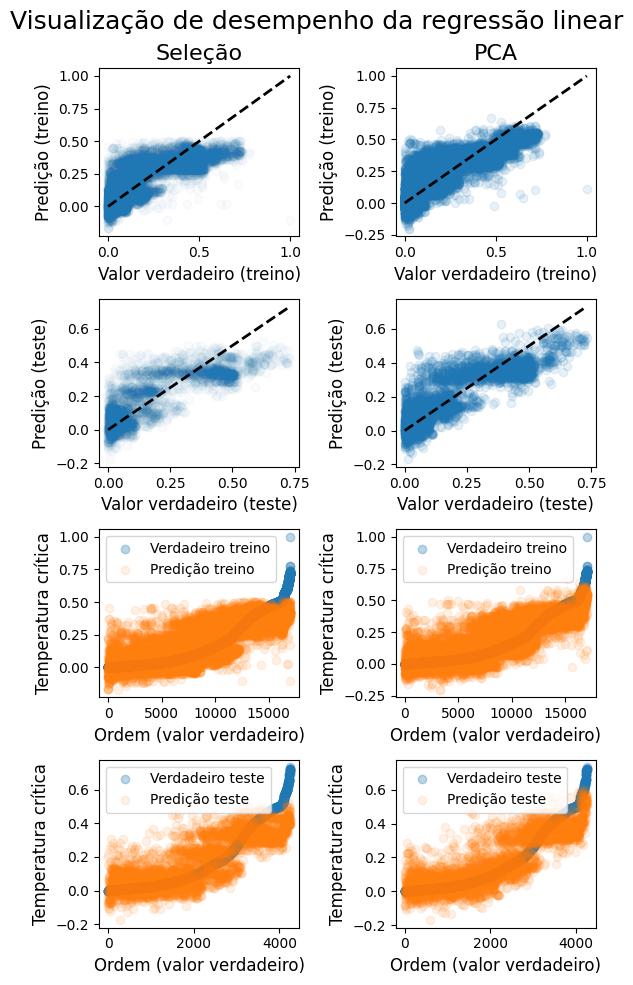

In [240]:
df_plot_linear_treino = pd.DataFrame({
    'y': y_treino,
    'predicao_atributos': predicao_linear_atributos_selecionados_treino,
    'predicao_pca': predicao_linear_pca_treino,
    'eixo_x': list(range(0, len(y_treino)))
})

df_plot_linear_teste = pd.DataFrame({
    'y': y_teste,
    'predicao_atributos': predicao_linear_atributos_selecionados_teste,
    'predicao_pca': predicao_linear_pca_teste,
    'eixo_x': list(range(0, len(y_teste)))
})

df_plot_linear_treino_ord = df_plot_linear_treino.sort_values(by='y')
df_plot_linear_teste_ord = df_plot_linear_teste.sort_values(by='y')

eixo_x_treino = list(range(0, len(y_treino)))
eixo_x_teste = list(range(0, len(y_teste)))

fig, axes = plt.subplots(4,2,figsize=(6,10))

axes[0,0].set_title('Seleção', size=16)
axes[0,1].set_title('PCA', size=16)

axes[0,0].scatter(y_treino, df_plot_linear_treino['predicao_atributos'], alpha=0.025)
axes[0,0].plot([y_treino.min(), y_treino.max()], [y_treino.min(), y_treino.max()], 'k--', lw=2)
axes[0,0].set_xlabel('Valor verdadeiro (treino)', size=12)
axes[0,0].set_ylabel('Predição (treino)', size=12)

axes[1,0].scatter(y_teste, df_plot_linear_teste['predicao_atributos'], alpha=0.025)
axes[1,0].plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'k--', lw=2)
axes[1,0].set_xlabel('Valor verdadeiro (teste)', size=12)
axes[1,0].set_ylabel('Predição (teste)', size=12)

axes[0,1].scatter(y_treino, df_plot_linear_treino['predicao_pca'], alpha=0.1)
axes[0,1].plot([y_treino.min(), y_treino.max()], [y_treino.min(), y_treino.max()], 'k--', lw=2)
axes[0,1].set_xlabel('Valor verdadeiro (treino)', size=12)
axes[0,1].set_ylabel('Predição (treino)', size=12)

axes[1,1].scatter(y_teste, df_plot_linear_teste['predicao_pca'], alpha=0.1)
axes[1,1].plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'k--', lw=2)
axes[1,1].set_xlabel('Valor verdadeiro (teste)', size=12)
axes[1,1].set_ylabel('Predição (teste)', size=12)

axes[2,0].scatter(eixo_x_treino, df_plot_linear_treino_ord['y'], alpha=.3, label='Verdadeiro treino')
axes[2,0].scatter(eixo_x_treino, df_plot_linear_treino_ord['predicao_atributos'], alpha=.1, label='Predição treino')
axes[2,0].set_ylabel('Temperatura crítica', size=12)
axes[2,0].set_xlabel('Ordem (valor verdadeiro)', size=12)
axes[2,0].legend()

axes[3,0].scatter(eixo_x_teste, df_plot_linear_teste_ord['y'], alpha=.3, label='Verdadeiro teste')
axes[3,0].scatter(eixo_x_teste, df_plot_linear_teste_ord['predicao_atributos'], alpha=.1, label='Predição teste')
axes[3,0].set_ylabel('Temperatura crítica', size=12)
axes[3,0].set_xlabel('Ordem (valor verdadeiro)', size=12)
axes[3,0].legend()

axes[2,1].scatter(eixo_x_treino, df_plot_linear_treino_ord['y'], alpha=.3, label='Verdadeiro treino')
axes[2,1].scatter(eixo_x_treino, df_plot_linear_treino_ord['predicao_pca'], alpha=.1, label='Predição treino')
axes[2,1].set_ylabel('Temperatura crítica', size=12)
axes[2,1].set_xlabel('Ordem (valor verdadeiro)', size=12)
axes[2,1].legend()

axes[3,1].scatter(eixo_x_teste, df_plot_linear_teste_ord['y'], alpha=.3, label='Verdadeiro teste')
axes[3,1].scatter(eixo_x_teste, df_plot_linear_teste_ord['predicao_pca'], alpha=.1, label='Predição teste')
axes[3,1].set_ylabel('Temperatura crítica', size=12)
axes[3,1].set_xlabel('Ordem (valor verdadeiro)', size=12)
axes[3,1].legend()

fig.suptitle('Visualização de desempenho da regressão linear', size=18)
plt.tight_layout();

Os gráficos superiores comparam as predições vs. valor verdadeiro, para conjuntos de treino e teste. Já os gráficos inferiores ordenam os valores verdadeiros (série suave e contínua em azul) e plotam, na mesma ordem no eixo $x$, a respectiva predição, também para conjuntos de treino e teste.

Esta inspeção visual é bastante reveladora. Ao que parece, os modelos lineares fazem predições em certas faixas de valores, o que fica visível principalmente no último gráfico. À medida que o valor verdadeiro sobe, vamos transicionando de faixa, embora essa transição ocorra com superposições relevantes. O PCA foi um pouco mais suave nessas faixas, e também performou apreciavelmente melhor no trecho final dos dados, que apresenta um crescimento vertiginoso de temperaturas críticas com o qual o modelo linear via seleção de atributos teve muita dificuldade de lidar.

---

# Random Forest

Esta seção é voltada a responder as questões sobre a aplicação do *random forest* ou *gradient boost*. Trata-se das questões: $4$ (avaliação da importância dos atributos); parte da $5$ (selecionar atributos mais importantes); e $8$ (construir dois modelos, um com atributos selecionados e outro com componentes principais).

Escolho usar a técnica de ensemble *random forest*.

## Importância e seleção dos atributos

Ao tentar uma busca para otimização de hiperparâmetros, notei que seria extremamente custoso computacionalmente fazer uma busca em grade em toda a base de treino. Nas máquinas que tenho acesso, não consegui rodar esse tipo de busca em tempo razoável. Abaixo, o que fiz foi rodar uma busca em grade apenas para um percentual do conjunto de treino ($20\%$), usando novamente a função `train_test_split` para evitar problemas básicos de amostragem. Inseri um marcador de tempo para nos dizer quanto tempo isso durou:

In [99]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# valores para o grid
search_dict_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# instanciacao
modelo_rf_importancia = RandomForestRegressor(random_state=13, n_jobs=-1)
# subamostra
X_treino_sub, _, y_treino_sub, _ = train_test_split(
    X_treino, y_treino, train_size=0.2, random_state=13
)
# marcador de tempo 1
tempo1 = time.perf_counter()
print(tempo1)
# fit com grid search
search_rf = GridSearchCV(modelo_rf_importancia, search_dict_rf, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, verbose=3)
search_rf.fit(X_treino_sub, y_treino_sub)
# marcador de tempo II
tempo2 = time.perf_counter()
print(tempo2)
# registro dos resultados
parametros_melhor_rf = search_rf.best_params_

586804.6711165
Fitting 5 folds for each of 108 candidates, totalling 540 fits
588383.7347465


Convertendo as unidades do marcador de tempo (segundos absolutos), vemos que apenas $20\%$ durou mais de $20$ minutos:

In [102]:
print(f'Tempo de execução: {round((tempo2-tempo1)/60,2)} minutos')

Tempo de execução: 26.32 minutos


Isso implica que a busca total duraria mais de duas horas. (Obs.: Fiz o mesmo separadamente usando subconjuntos menores. Embora tenha havido alguma variação, os parâmetros se comportaram na grande maioria dos casos conforme os parâmetros encontrados pela busca realizada acima.)

Os parâmetros encontrados foram:

In [103]:
parametros_melhor_rf

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

Usando tais parâmetros, rodo o modelo novamente:

In [105]:
# instanciacao com parametros acima
modelo_rf_importancia = RandomForestRegressor(random_state=13, n_jobs=-1, **parametros_melhor_rf)

# fit com parametros acima
modelo_rf_importancia.fit(X_treino, y_treino)

# predicao para conjuntos de treino e teste
predicao_rf_atributos_treino = modelo_rf_importancia.predict(X_treino)
predicao_rf_atributos_teste = modelo_rf_importancia.predict(X_teste)

# comparacao entre conjuntos de treino e teste
comparar_metricas(predicao_rf_atributos_treino, y_treino, predicao_rf_atributos_teste, y_teste, 'treino', 'teste')


,treino,teste
R^2,0.972354,0.925689
MSE,0.000889,0.002318
MAE,0.015576,0.027609
RMSE,0.029821,0.048142


Os resultados evidenciam desempenho bastante superior ao modelo linear. Porém, aqui há sinais de *overfitting*, com performance superior no conjunto de treino, mas não é uma diferença tão drástica e não impede o modelo de ter métricas satisfatórias, com $R^2$ elevado ($\geq 0.9$) e erros abaixo de $5\%$.

Para avaliar a importância de cada atributo, considero que o ideal seria usar o método SHAP. O problema é que não fui capaz de rodar este método em tempo hábil nas máquinas às quais tive acesso. Tendo em vista todas as operações necessárias para plotar os $21$mil+ pontos em um gráfico, além da computação do indicador em si, é compreensível. Tampouco fui capaz de desenvolver alguma forma parcial de cálculo ou estimativa de complexidade algorítmica.

Por isso, recorri à métrica de importâncias menos granular oferecida pelo SKLearn. Abaixo construo um *dataframe* apenas para visualização dos valores de importância dos $80$ atributos mais importantes (deixando apenas um de fora):

In [166]:
importancias_melhor_rf = modelo_rf_importancia.feature_importances_

importancias_serie = pd.Series(importancias_melhor_rf, index=X_treino.columns).sort_values(ascending=False)

df_print = pd.DataFrame({
    'atributos 1-20': importancias_serie.index[0:20],
    'importância 1-20': importancias_serie.values[0:20],
    'atributos 21-40': importancias_serie.index[20:40],
    'importância 21-40': importancias_serie.values[20:40],
    'atributos 41-60': importancias_serie.index[40:60],
    'importância 41-60': importancias_serie.values[40:60],
    'atributos 61-80': importancias_serie.index[60:80],
    'importância 61-80': importancias_serie.values[60:80]
})

df_print

,atributos 1-20,importância 1-20,atributos 21-40,importância 21-40,atributos 41-60,importância 41-60,atributos 61-80,importância 61-80
0,r_tc,0.539412,gm_d,0.005914,wgm_d,0.002783,s_ea,0.001471
1,wgm_tc,0.127901,ws_am,0.005893,wm_d,0.002728,gm_am,0.001457
2,s_am,0.019805,wr_f,0.005883,wm_fh,0.002669,m_f,0.001440
3,wgm_v,0.019270,we_fh,0.005594,wgm_fh,0.002654,m_fh,0.001439
4,we_tc,0.013669,e_d,0.005455,wm_ar,0.002610,e_ar,0.001425
5,s_d,0.012263,ws_ar,0.005019,wm_f,0.002578,m_ar,0.001336
6,wm_v,0.012066,s_ar,0.004937,r_ea,0.002367,s_v,0.001286
7,m_d,0.010417,we_v,0.004550,m_tc,0.002135,e_ea,0.001246
8,gm_ea,0.010314,wgm_ea,0.004518,wgm_f,0.002118,s_f,0.001092
9,ws_v,0.010089,we_am,0.004256,wgm_ar,0.002043,e_f,0.001059


É possível notar que o topo da distribuição é altamente não linear, com os dois atributos mais importantes, `range_ThermalConductivity` e `wtd_gmean_ThermalConductivity` concentrando cerca de dois terços da importância:

In [173]:
print(f'Importância dos 2 mais importantes: {round(100*importancias_serie[0:2].sum(),2)}%')

Importância dos 2 mais importantes: 66.73%


Deixado de fora da tabela acima, o atributo menos importante foi o número de elementos, com menos de $0.01\%$ de importância:

In [176]:
print(f'Importância do atributo número de elementos: {round(100*importancias_serie.values[-1],5)}%')

Importância do atributo número de elementos: 0.00172%


As visualizações abaixo nos ajudam a ver a não linearidade dos dados. Primeiro, ploto um gráfico de barras com todos os atributos, e ao lado um gráfico de barras sem os dois mais importantes:

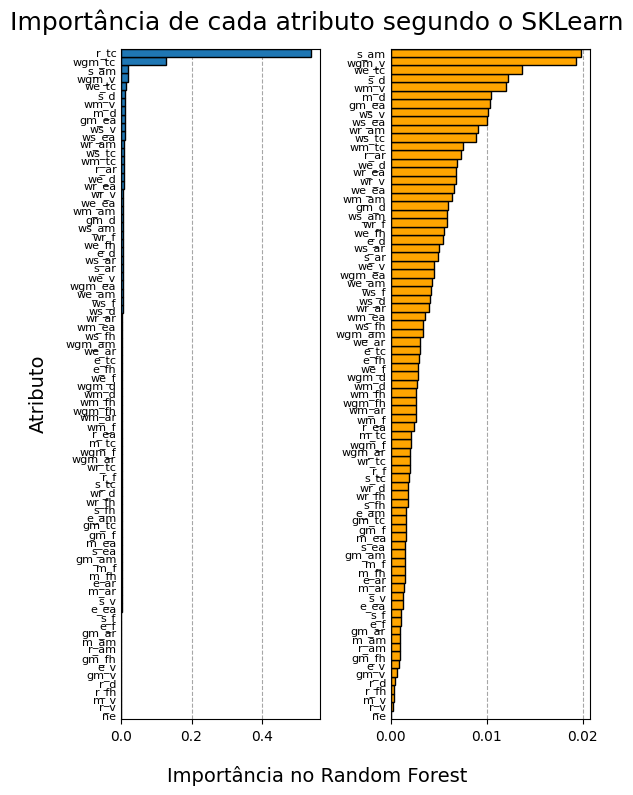

In [212]:
importancias_serie = pd.Series(importancias_melhor_rf, index=X_treino.columns).sort_values()
subserie = importancias_serie[0:-2]

fig, axes = plt.subplots(1,2,figsize=(6,8))
axes[0].barh(importancias_serie.index, importancias_serie.values, height=1, edgecolor='black', zorder=2)
axes[0].grid(axis='x', which='major', linestyle='--', color='gray', alpha=0.7, zorder=1)
axes[0].tick_params(axis='y', labelsize=8, pad=0)
axes[0].tick_params(axis='y', which='both', left=False, right=False, labelleft=True)
axes[0].set_ylim(-0.5, len(X.columns)-0.5)


axes[1].barh(importancias_serie.index, importancias_serie.values, height=1, color='orange', edgecolor='black', zorder=2)
axes[1].grid(axis='x', which='major', linestyle='--', color='gray', alpha=0.7, zorder=1)
axes[1].tick_params(axis='y', labelsize=8, pad=0)
axes[1].tick_params(axis='y', which='both', left=False, right=False, labelleft=True)
axes[1].set_ylim(-0.5, (len(X.columns)-2)-0.5)
axes[1].set_xlim(0, subserie.max()+0.001)

fig.suptitle('Importância de cada atributo segundo o SKLearn', size=18)
fig.supxlabel('Importância no Random Forest', size=14)
fig.supylabel('Atributo', size=14)
plt.tight_layout();

Em seguida, abaixo, uso uma escala lorgarítmica na importância, plotando os atributos em ordem ascendente de importância:

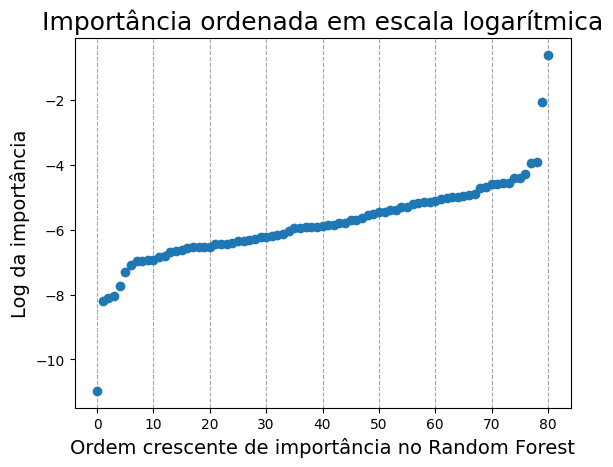

In [221]:
plt.scatter(list(range(0,81)), np.log(importancias_serie.values), zorder=2)
plt.ylabel('Log da importância', size=14)
plt.xlabel('Ordem crescente de importância no Random Forest', size=14)
plt.title('Importância ordenada em escala logarítmica', size=18)
plt.grid(axis='x', which='major', linestyle='--', color='gray', alpha=0.7, zorder=1)


A escala logarítmica é curiosa, mostrando por um lado caudas de inclinação vertiginosa e por outro, uma região central de baixa inclinação.

É fácil notar que os $4$ atributos mais importantes devem ser incluídos, pois se distanciam nitidamente dos demais. Porém, a existência desta região central faz com que novamente qualquer recorte seja arbitrário. Não obstante, é possível perceber que existe um leve degrau entre o $14$º e o $13$º valor (por ordem do mais ao menos importante). Trata-se de uma queda relativa razoavelmente grande nesta região. Uso então este número por ser também comparável à quantidade de atributos escolhidos no modelo linear e no PCA. Os 13 atributos escolhidos são responsáveis por cerca de $80\%$ da importância no *random forest* construído acima:

In [224]:
print(f'Importância dos 13 atributos mais importantes no Random Forest:\n{round(100*importancias_serie[-13:].sum(), 2)}%')

Importância dos 13 atributos mais importantes no Random Forest:
80.32%


Tais atributos são: `wtd_std_ThermalConductivity`, `wtd_range_atomic_mass`, `wtd_std_ElectronAffinity`, `wtd_std_Valence`, `gmean_ElectronAffinity`, `mean_Density`, `wtd_mean_Valence`, `std_Density`, `wtd_entropy_ThermalConductivity`, `wtd_gmean_Valence`, `std_atomic_mass`, `wtd_gmean_ThermalConductivity`, e `range_ThermalConductivity`.

Consolidando a seleção:

In [230]:
X_treino_rf_atributos_selecionados = X_treino[list(importancias_serie.index[-13:])]
X_teste_rf_atributos_selecionados = X_teste[list(importancias_serie.index[-13:])]

## Predição

Respondo agora à questão $8$.a), rodando um *random forest* no conjunto com $13$ atributos selecionados:

In [231]:
modelo_rf_atributos = RandomForestRegressor(random_state=13, n_jobs=-1, **parametros_melhor_rf)
modelo_rf_atributos.fit(X_treino_rf_atributos_selecionados, y_treino)
predicao_rf_atributos_selecionados_treino = modelo_rf_atributos.predict(X_treino_rf_atributos_selecionados)
predicao_rf_atributos_selecionados_teste = modelo_rf_atributos.predict(X_teste_rf_atributos_selecionados)

comparar_metricas(predicao_rf_atributos_selecionados_treino, y_treino, predicao_rf_atributos_selecionados_teste, y_teste, 'treino', 'teste')


,treino,teste
R^2,0.968622,0.918057
MSE,0.001003,0.002546
MAE,0.016969,0.029067
RMSE,0.031672,0.050454


O modelo teve desempenho muito parecido com o melhor modelo da busca em grade (que usou $81$ atributos), indicando que a seleção de atributos não parece ter excluído informação relevante, nem ocasionou piora ou melhora de *overfitting*.

Abaixo respondo à questão $8$.b), rodando um *random forest* no conjunto de $10$ componentes principais selecionados a partir da redução de dimensionalidade usando o PCA:

In [232]:
modelo_rf_pca = RandomForestRegressor(random_state=13, n_jobs=-1, **parametros_melhor_rf)
modelo_rf_pca.fit(X_treino_pca, y_treino)
predicao_rf_pca_treino = modelo_rf_pca.predict(X_treino_pca)
predicao_rf_pca_teste = modelo_rf_pca.predict(X_teste_pca)

comparar_metricas(predicao_rf_pca_treino, y_treino, predicao_rf_pca_teste, y_teste, 'treino', 'teste')


,treino,teste
R^2,0.971298,0.913143
MSE,0.000914,0.002639
MAE,0.016242,0.029922
RMSE,0.030225,0.051370


Os resultados são de novo muito parecidos, com leve piora dos indicadores, mas sem alterar as conclusões.

Recorro mais uma vez à visualização comparativa feita para a regressão linear, agora com os resultados do *random forest*:

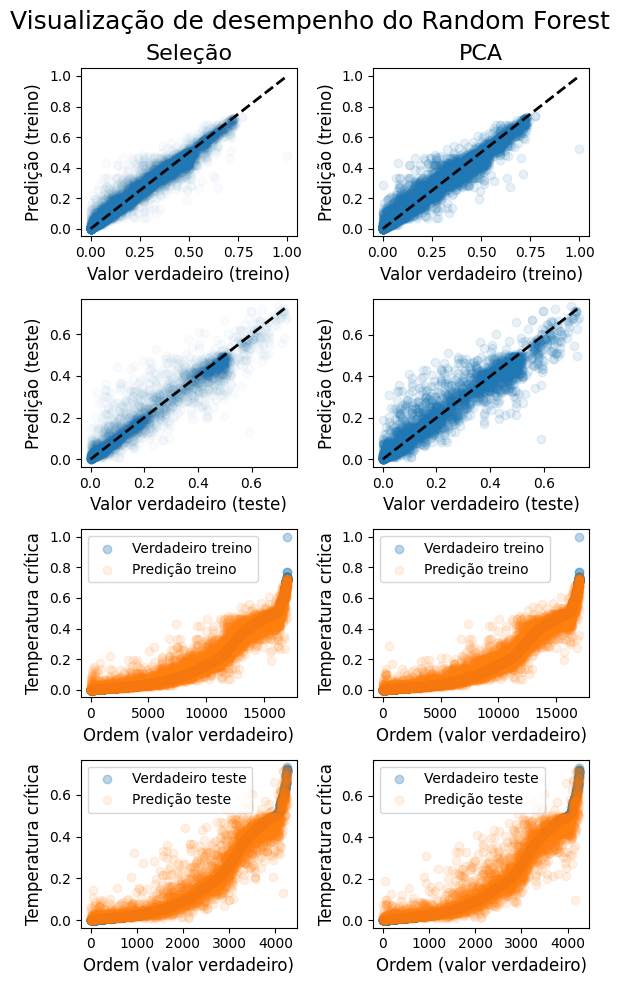

In [238]:
df_plot_rf_treino = pd.DataFrame({
    'y': y_treino,
    'predicao_atributos': predicao_rf_atributos_selecionados_treino,
    'predicao_pca': predicao_rf_pca_treino,
    'eixo_x': list(range(0, len(y_treino)))
})

df_plot_rf_teste = pd.DataFrame({
    'y': y_teste,
    'predicao_atributos': predicao_rf_atributos_selecionados_teste,
    'predicao_pca': predicao_rf_pca_teste,
    'eixo_x': list(range(0, len(y_teste)))
})

df_plot_rf_treino_ord = df_plot_rf_treino.sort_values(by='y')
df_plot_rf_teste_ord = df_plot_rf_teste.sort_values(by='y')

eixo_x_treino = list(range(0, len(y_treino)))
eixo_x_teste = list(range(0, len(y_teste)))

fig, axes = plt.subplots(4,2,figsize=(6,10))

axes[0,0].set_title('Seleção', size=16)
axes[0,1].set_title('PCA', size=16)

axes[0,0].scatter(y_treino, df_plot_rf_treino['predicao_atributos'], alpha=0.025)
axes[0,0].plot([y_treino.min(), y_treino.max()], [y_treino.min(), y_treino.max()], 'k--', lw=2)
axes[0,0].set_xlabel('Valor verdadeiro (treino)', size=12)
axes[0,0].set_ylabel('Predição (treino)', size=12)

axes[1,0].scatter(y_teste, df_plot_rf_teste['predicao_atributos'], alpha=0.025)
axes[1,0].plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'k--', lw=2)
axes[1,0].set_xlabel('Valor verdadeiro (teste)', size=12)
axes[1,0].set_ylabel('Predição (teste)', size=12)

axes[0,1].scatter(y_treino, df_plot_rf_treino['predicao_pca'], alpha=0.1)
axes[0,1].plot([y_treino.min(), y_treino.max()], [y_treino.min(), y_treino.max()], 'k--', lw=2)
axes[0,1].set_xlabel('Valor verdadeiro (treino)', size=12)
axes[0,1].set_ylabel('Predição (treino)', size=12)

axes[1,1].scatter(y_teste, df_plot_rf_teste['predicao_pca'], alpha=0.1)
axes[1,1].plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'k--', lw=2)
axes[1,1].set_xlabel('Valor verdadeiro (teste)', size=12)
axes[1,1].set_ylabel('Predição (teste)', size=12)

axes[2,0].scatter(eixo_x_treino, df_plot_rf_treino_ord['y'], alpha=.3, label='Verdadeiro treino')
axes[2,0].scatter(eixo_x_treino, df_plot_rf_treino_ord['predicao_atributos'], alpha=.1, label='Predição treino')
axes[2,0].set_ylabel('Temperatura crítica', size=12)
axes[2,0].set_xlabel('Ordem (valor verdadeiro)', size=12)
axes[2,0].legend()

axes[3,0].scatter(eixo_x_teste, df_plot_rf_teste_ord['y'], alpha=.3, label='Verdadeiro teste')
axes[3,0].scatter(eixo_x_teste, df_plot_rf_teste_ord['predicao_atributos'], alpha=.1, label='Predição teste')
axes[3,0].set_ylabel('Temperatura crítica', size=12)
axes[3,0].set_xlabel('Ordem (valor verdadeiro)', size=12)
axes[3,0].legend()

axes[2,1].scatter(eixo_x_treino, df_plot_rf_treino_ord['y'], alpha=.3, label='Verdadeiro treino')
axes[2,1].scatter(eixo_x_treino, df_plot_rf_treino_ord['predicao_pca'], alpha=.1, label='Predição treino')
axes[2,1].set_ylabel('Temperatura crítica', size=12)
axes[2,1].set_xlabel('Ordem (valor verdadeiro)', size=12)
axes[2,1].legend()

axes[3,1].scatter(eixo_x_teste, df_plot_rf_teste_ord['y'], alpha=.3, label='Verdadeiro teste')
axes[3,1].scatter(eixo_x_teste, df_plot_rf_teste_ord['predicao_pca'], alpha=.1, label='Predição teste')
axes[3,1].set_ylabel('Temperatura crítica', size=12)
axes[3,1].set_xlabel('Ordem (valor verdadeiro)', size=12)
axes[3,1].legend()

fig.suptitle('Visualização de desempenho do Random Forest', size=18)
plt.tight_layout();

Aqui também existe algum encaixe em faixas de valores, porém é muito menos perceptível que no modelo linear, e aparenta haver transições mais suaves e com menos sobreposição. Embora ainda haja um resíduo substancial, os gráficos superiores demonstram que o modelo conseguiu seguir mais ou menos a tendência linear esperada da função identidade. Já os gráficos inferiores atestam que o modelo seguiu em linhas gerais a curva da temperatura crítica ordenada da menor à maior, conseguindo adentrar inclusive na cauda mais íngreme superior.

---

# Comparações e conclusão

Aqui, faço um balanço das análises e organizo a resposta à questão $9$ do enunciado.

Quanto ao custo computacional, a regressão linear foi muito mais simples, rodando rapidamente e permitindo uma busca em grade extensiva. Já o *random forest* foi mais intensivo, o que limitou a busca em grade e o estudo dos atributos mais importantes. Investigações mais profundas nesse sentido exigiriam ou máquinas melhores ou técnicas mais incrementadas de otimização.

Em contrapartida, quanto ao desempenho, ficou claro que o *random forest* foi muito superior, sendo capaz de entregar uma análise razoavelmente precisa mesmo trabalhando com cerca de um oitavo dos atributos originais. Em termos de métricas, o *random forest* ficou com $R^2$ acima de $0.9$ e RMSE na faixa de $5\%$, contra um $R^2$ nunca superior a $0.7$ e um RMSE na faixa de $10\%$ no caso da regressão linear.

Uma observação que os gráficos de comparação de predições nos permitem fazer quanto a isso é que existem alguns poucos *outliers* no conjunto de treino, cuja temperatura crítica normalizada é muito alta. Como esses dados não estão presentes nos gráficos do conjunto de teste (possivelmente devido à sua raridade), todo o eixo desses gráficos é deslocado para uma faixa de valores que vai até $\approx 0.8$.

Decidi não excluir esses pontos justamente para testar os modelos aqui empregados quanto à presença de *outliers*. Com efeito, vimos na análise exploratória que a nossa base possui muitos atributos com elevado grau de não-linearidade em suas distribuições. A regressão linear, sendo inerentemente linear, fez previsões que se encaixaram mais em faixas ou blocos, falhando em reproduzir transições suaves e em detectar não-linearidades acentuadas, tais como a curva íngreme na faixa final da temperatura crítica (quando ordenamos os materias em ordem crescente de temperatura crítica).

Esta capacidade do *random forest* se refletiu na distribuição de importâncias dos atributos, havendo enorme discrepância entre eles, com uma distribuição também acentuadamente não-linear (sequer log-linear). A interpretabilidade nesse caso ficou facilitada para o topo da distribuição, embora ali residam poucos atributos em faixas realmente distintas (no máximo 4).

Para o restante da distribuição de importância, o *random forest* também apresentou necessidade de certa arbitrariedade para definir o critério de corte. Ele ainda se saiu um pouco melhor que a seleção feita via coeficientes da regressão linear, mesmo usando *elastic net*, visto que, nesta última, $12$ atributos explicaram apenas $\approx 75\%$ dos resultados, enquanto no primeiro, $13$ atributos explicaram $80\%$. Neste quesito, o PCA mostrou uma vantagem, visto que apenas $10$ componentes foram capazes de explicar $90\%$ dos resultados. Porém, o PCA possui a desvantagem de os componentes serem combinações lineares dos atributos, o que comprovamos ser um complicador quando constatamos que, na lista do top 1 atributo de cada componente, vimos um atributo se repetir. A investigação do PCA necessita olhar para as efetivas distribuições dos coeficientes destas combinações lineares, o que tem complexidade $\mathbb{O}(n^2)$ (no nosso caso, $81^2$), adicionando um véu extra sobre a interpretabilidade.

Para finalizar a análise de interpretabilidade, construo abaixo um mapeamento para traduzir os nomes dos atributos aos seus nomes originais e em seguida listo os atributos selecionados em cada método:

In [258]:
atributos_dict = {
    'number_of_elements': 'ne',
    'mean_atomic_mass': 'm_am',
    'wtd_mean_atomic_mass': 'wm_am',
    'gmean_atomic_mass': 'gm_am',
    'wtd_gmean_atomic_mass': 'wgm_am',
    'entropy_atomic_mass': 'e_am',
    'wtd_entropy_atomic_mass': 'we_am',
    'range_atomic_mass': 'r_am',
    'wtd_range_atomic_mass': 'wr_am',
    'std_atomic_mass': 's_am',
    'wtd_std_atomic_mass': 'ws_am',
    'mean_fie': 'm_f',
    'wtd_mean_fie': 'wm_f',
    'gmean_fie': 'gm_f',
    'wtd_gmean_fie': 'wgm_f',
    'entropy_fie': 'e_f',
    'wtd_entropy_fie': 'we_f',
    'range_fie': 'r_f',
    'wtd_range_fie': 'wr_f',
    'std_fie': 's_f',
    'wtd_std_fie': 'ws_f',
    'mean_atomic_radius': 'm_ar',
    'wtd_mean_atomic_radius': 'wm_ar',
    'gmean_atomic_radius': 'gm_ar',
    'wtd_gmean_atomic_radius': 'wgm_ar',
    'entropy_atomic_radius': 'e_ar',
    'wtd_entropy_atomic_radius': 'we_ar',
    'range_atomic_radius': 'r_ar',
    'wtd_range_atomic_radius': 'wr_ar',
    'std_atomic_radius': 's_ar',
    'wtd_std_atomic_radius': 'ws_ar',
    'mean_Density': 'm_d',
    'wtd_mean_Density': 'wm_d',
    'gmean_Density': 'gm_d',
    'wtd_gmean_Density': 'wgm_d',
    'entropy_Density': 'e_d',
    'wtd_entropy_Density': 'we_d',
    'range_Density': 'r_d',
    'wtd_range_Density': 'wr_d',
    'std_Density': 's_d',
    'wtd_std_Density': 'ws_d',
    'mean_ElectronAffinity': 'm_ea',
    'wtd_mean_ElectronAffinity': 'wm_ea',
    'gmean_ElectronAffinity': 'gm_ea',
    'wtd_gmean_ElectronAffinity': 'wgm_ea',
    'entropy_ElectronAffinity': 'e_ea',
    'wtd_entropy_ElectronAffinity': 'we_ea',
    'range_ElectronAffinity': 'r_ea',
    'wtd_range_ElectronAffinity': 'wr_ea',
    'std_ElectronAffinity': 's_ea',
    'wtd_std_ElectronAffinity': 'ws_ea',
    'mean_FusionHeat': 'm_fh',
    'wtd_mean_FusionHeat': 'wm_fh',
    'gmean_FusionHeat': 'gm_fh',
    'wtd_gmean_FusionHeat': 'wgm_fh',
    'entropy_FusionHeat': 'e_fh',
    'wtd_entropy_FusionHeat': 'we_fh',
    'range_FusionHeat': 'r_fh',
    'wtd_range_FusionHeat': 'wr_fh',
    'std_FusionHeat': 's_fh',
    'wtd_std_FusionHeat': 'ws_fh',
    'mean_ThermalConductivity': 'm_tc',
    'wtd_mean_ThermalConductivity': 'wm_tc',
    'gmean_ThermalConductivity': 'gm_tc',
    'wtd_gmean_ThermalConductivity': 'wgm_tc',
    'entropy_ThermalConductivity': 'e_tc',
    'wtd_entropy_ThermalConductivity': 'we_tc',
    'range_ThermalConductivity': 'r_tc',
    'wtd_range_ThermalConductivity': 'wr_tc',
    'std_ThermalConductivity': 's_tc',
    'wtd_std_ThermalConductivity': 'ws_tc',
    'mean_Valence': 'm_v',
    'wtd_mean_Valence': 'wm_v',
    'gmean_Valence': 'gm_v',
    'wtd_gmean_Valence': 'wgm_v',
    'entropy_Valence': 'e_v',
    'wtd_entropy_Valence': 'we_v',
    'range_Valence': 'r_v',
    'wtd_range_Valence': 'wr_v',
    'std_Valence': 's_v',
    'wtd_std_Valence': 'ws_v',
    'critical_temp': 'tc'
}

lista_pca = nome_variaveis_originais + ['','','']
lista_linear = list(X_treino_linear_atributos_selecionados.columns) + ['']
lista_rf = list(X_teste_rf_atributos_selecionados.columns)

df_principais = pd.DataFrame({
    'PCA': lista_pca,
    'Seleção do Linear': lista_linear,
    'Seleção do Random Forest': lista_rf
})

for chave, valor in atributos_dict.items():
    df_principais = df_principais.replace(valor, chave)

df_principais.index = list(range(1,14))
df_principais


,PCA,Seleção do Linear,Seleção do Random Forest
1,range_ThermalConductivity,wtd_mean_ThermalConductivity,wtd_std_ThermalConductivity
2,wtd_entropy_ThermalConductivity,wtd_std_Valence,wtd_range_atomic_mass
3,range_FusionHeat,std_ThermalConductivity,wtd_std_ElectronAffinity
4,wtd_std_atomic_mass,gmean_ElectronAffinity,wtd_std_Valence
5,range_FusionHeat,number_of_elements,gmean_ElectronAffinity
6,range_atomic_mass,wtd_entropy_FusionHeat,mean_Density
7,wtd_range_fie,gmean_Density,wtd_mean_Valence
8,range_Valence,std_atomic_radius,std_Density
9,range_Valence,std_FusionHeat,wtd_entropy_ThermalConductivity
10,range_ElectronAffinity,wtd_entropy_fie,wtd_gmean_Valence


Chama a atenção a importância dada por todos os modelos aos indicadores de dispersão dentre os elementos do material (i.e., indicadores de desvios padrão, *ranges*, número de elementos e entropia). No caso do PCA, todos os atributos com maior coeficiente linear são desse tipo. No caso do *random forest*, os quatro primeiros atributos, muito mais influentes que os demais, são todos desse tipo, junto com mais cinco. No caso da regressão linear, eu mesmo dei preferência a atributos que justamente não eram desse tipo, de modo que houve uma redução artificial desses atributos, talvez forçando o modelo a usar seus correlatos. Mas mesmo assim eles formaram oito dos doze mais importantes.

Em termos de grandezas físicas, a mais usada foi a condutividade térmica (nove vezes), seguida pela valência (seis vezes), pela massa atômica (cinco vezes), e pela afinidade eletrônica e o calor de fusão (ambas quatro vezes). Visto que a condutividade térmica é altamente correlacionada com o calor de fusão e anticorrelacionada com a energia de ionização (que aparece duas vezes), bem como anti e correlacionada com indicadores da valência e, embora não tão intensamente mas ainda de maneira relevante, com o calor de fusão, temos um total de $21$ aparições correlatas na lista acima, que contém $35$ entradas. Ou seja, esse bloco de variáveis térmicas/energéticas compõe $71\%$ da lista. Outro bloco com alta correlação é aquele com massa atômica, densidade (três aparições) e raio atômico (duas aparições), e em alguma medida (mas não tão forte), número de elementos, que compõe todo o resto da lista. 

Acredito que esses dois blocos fazem sentido de um ponto de vista físico, pois o primeiro se relaciona com a mobilidade eletrônica do material e o segundo com as frequências de vibração dos fônons.

Noto que essa interpretação ainda é bastante rasa e especulativa. Além disso, foi necessário usar os três métodos de seleção para chegar a ela. No meu entender, isso evidencia a complexidade da interpretabilidade na aplicação desses tipos de modelo para analisar bases envolvendo muitos atributos com fortes correlações absolutas.